<a href="https://colab.research.google.com/github/Fatai-soliu/bank-telemarketing/blob/main/Comparative_Analysis_of_KNN_and_Decision_Tree_Algorithms_in_Predicting_Student_Dropout_and_Academic_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparative Analysis of KNN and Decision Tree Algorithms in Predicting Student Dropout and Academic Success

This notebook focus on the analysis and

In [1]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Import the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/data.csv')

In [3]:
data.head(10)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   
5                             0                      19   
6                             1                       1   
7                             1                       1   
8                             1                       1   
9                             1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   
5                           133.1            1                      37   
6                           142.0            1                      19   
7                           119.0            1                      37   
8                           137.0           62                       1   
9                           138.0            1                       1   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   
5                      37  ...                                    0   
6                      38  ...                                    0   
7                      37  ...                                    0   
8                       1  ...                                    0   
9                      19  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   
5                                    5   
6                                    8   
7                                    5   
8                                    6   
9                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grad

The original dataset has already been encoded. To perform effective exploratory data analysis (EDA), the categorical variables will be decoded to ensure the data is clearly interpretable.

In [4]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [5]:
# Dictionary mappings for the dataset

data_mappings = {
    "Marital status": {
        1: "single", 2: "married", 3: "widower", 4: "divorced", 5: "facto union", 6: "legally separated"
    },
    "Application mode": {
        1: "1st phase - general contingent", 2: "Ordinance No. 612/93", 5: "1st phase - special contingent (Azores Island)",
        7: "Holders of other higher courses", 10: "Ordinance No. 854-B/99", 15: "International student (bachelor)",
        16: "1st phase - special contingent (Madeira Island)", 17: "2nd phase - general contingent",
        18: "3rd phase - general contingent", 26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
        27: "Ordinance No. 533-A/99, item b3 (Other Institution)", 39: "Over 23 years old", 42: "Transfer",
        43: "Change of course", 44: "Technological specialization diploma holders",
        51: "Change of institution/course", 53: "Short cycle diploma holders",
        57: "Change of institution/course (International)"
    },
    "Application order": {
        i: f"{i} - {'first choice' if i == 0 else 'last choice' if i == 9 else 'choice'}" for i in range(10)
    },
    "Course": {
        33: "Biofuel Production Technologies", 171: "Animation and Multimedia Design", 8014: "Social Service (evening attendance)",
        9003: "Agronomy", 9070: "Communication Design", 9085: "Veterinary Nursing", 9119: "Informatics Engineering",
        9130: "Equinculture", 9147: "Management", 9238: "Social Service", 9254: "Tourism", 9500: "Nursing",
        9556: "Oral Hygiene", 9670: "Advertising and Marketing Management", 9773: "Journalism and Communication",
        9853: "Basic Education", 9991: "Management (evening attendance)"
    },
    "Daytime/evening attendance\t": {
        1: "daytime", 0: "evening"
    },
    "Previous qualification": {
        1: "Secondary education", 2: "Higher education - bachelor's degree", 3: "Higher education - degree",
        4: "Higher education - master's", 5: "Higher education - doctorate", 6: "Frequency of higher education",
        9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
        12: "Other - 11th year of schooling", 14: "10th year of schooling", 15: "10th year of schooling - not completed",
        19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.", 38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course", 43: "Higher education - master (2nd cycle)"
    },
    "Nacionality": {
        1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch", 14: "English",
        17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean", 25: "Mozambican", 26: "Santomean",
        32: "Turkish", 41: "Brazilian", 62: "Romanian", 100: "Moldova (Republic of)", 101: "Mexican",
        103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
    },
    "Mother's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree", 4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed", 10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)", 12: "Other - 11th Year of Schooling", 14: "10th Year of Schooling",
        18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        22: "Technical-professional course", 26: "7th year of schooling", 27: "2nd cycle of the general high school course",
        29: "9th Year of Schooling - Not Completed", 30: "8th year of schooling", 34: "Unknown", 35: "Can't read or write",
        36: "Can read without having a 4th year of schooling", 37: "Basic education 1st cycle (4th/5th year) or equiv.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course", 42: "Professional higher technical course",
        43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Father's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree", 4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed", 10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)", 12: "Other - 11th Year of Schooling", 13: "2nd year complementary high school course",
        14: "10th Year of Schooling", 18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        20: "Complementary High School Course", 22: "Technical-professional course", 25: "Complementary High School Course - not concluded",
        26: "7th year of schooling", 27: "2nd cycle of the general high school course", 29: "9th Year of Schooling - Not Completed",
        30: "8th year of schooling", 31: "General Course of Administration and Commerce", 33: "Supplementary Accounting and Administration",
        34: "Unknown", 35: "Can't read or write", 36: "Can read without having a 4th year of schooling",
        37: "Basic education 1st cycle (4th/5th year) or equiv.", 38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course",
        42: "Professional higher technical course", 43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"
    },
    "Mother's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
        4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 7: "Skilled Workers in Industry, Construction and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers", 10: "Armed Forces Professions",
        90: "Other Situation", 99: "(blank)", 122: "Health professionals", 123: "teachers", 125: "Specialists in information and communication technologies (ICT)",
        131: "Intermediate level science and engineering technicians and professions", 132: "Technicians and professionals, of intermediate level of health",
        134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 141: "Office workers, secretaries in general and data processing operators",
        143: "Data, accounting, statistical, financial services and registry-related operators", 144: "Other administrative support staff",
        151: "personal service workers", 152: "sellers", 153: "Personal care workers and the like", 171: "Skilled construction workers and the like, except electricians",
        173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like", 175: "Workers in food processing, woodworking, clothing and other industries and crafts",
        191: "cleaning workers", 192: "Unskilled workers in agriculture, animal production, fisheries and forestry", 193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
        194: "Meal preparation assistants"
    },
    "Father's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
        2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
        4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
        6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 7: "Skilled Workers in Industry, Construction and Craftsmen",
        8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers", 10: "Armed Forces Professions",
        90: "Other Situation", 99: "(blank)", 101: "Armed Forces Officers", 102: "Armed Forces Sergeants",
        103: "Other Armed Forces personnel", 112: "Directors of administrative and commercial services",
        114: "Hotel, catering, trade and other services directors", 121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
        122: "Health professionals", 123: "teachers", 124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
        131: "Intermediate level science and engineering technicians and professions", 132: "Technicians and professionals, of intermediate level of health",
        134: "Intermediate level technicians from legal, social, sports, cultural and similar services", 135: "Information and communication technology technicians",
        141: "Office workers, secretaries in general and data processing operators", 143: "Data, accounting, statistical, financial services and registry-related operators",
        144: "Other administrative support staff", 151: "personal service workers", 152: "sellers",
        153: "Personal care workers and the like", 154: "Protection and security services personnel",
        161: "Market-oriented farmers and skilled agricultural and animal production workers",
        163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence", 171: "Skilled construction workers and the like, except electricians",
        172: "Skilled workers in metallurgy, metalworking and similar", 174: "Skilled workers in electricity and electronics",
        175: "Workers in food processing, woodworking, clothing and other industries and crafts", 181: "Fixed plant and machine operators",
        182: "assembly workers", 183: "Vehicle drivers and mobile equipment operators", 192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
        193: "Unskilled workers in extractive industry, construction, manufacturing and transport", 194: "Meal preparation assistants",
        195: "Street vendors (except food) and street service providers"
    },
    "Displaced": {1: "yes", 0: "no"},
    "Educational special needs": {1: "yes", 0: "no"},
    "Debtor": {1: "yes", 0: "no"},
    "Tuition fees up to date": {1: "yes", 0: "no"},
    "Gender": {1: "male", 0: "female"},
    "Scholarship holder": {1: "yes", 0: "no"},
    "International": {1: "yes", 0: "no"}
}

In [6]:
#Mapping the dict to the original dataset

for column, mapping in data_mappings.items():
    if column in data.columns:
        data[column] = data[column].map(mapping).fillna(data[column])

The dictionary contain the categorical values has been mapped with the original dataset and fillna was used to retain the data for non-categorical variables

In [7]:
data.head()

Marital status                  Application mode Application order  \
0         single    2nd phase - general contingent        5 - choice   
1         single  International student (bachelor)        1 - choice   
2         single    1st phase - general contingent        5 - choice   
3         single    2nd phase - general contingent        2 - choice   
4        married                 Over 23 years old        1 - choice   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese   
1    Secondary education                           160.0  Portuguese   
2    Secondary education                           122.0  Portuguese   
3    Secondary education                           122.0  Portuguese   
4    Secondary education                           100.0  Portuguese   

                              Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   

                              Father's qualification  ...  \
0                     Other - 11th Year of Schooling  ...   
1                          Higher Education - Degree  ...   
2  Basic education 1st cycle (4th/5th year) or eq...  ...   
3  Basic education 1st cycle (4th/5th year) or eq...  ...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   

  Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled)  \
0                                   0                                   0   
1                                   0                                   6   
2                                   0                                   6   
3                                   0                                   6   
4                                   0                                   6   

   Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved)  \
0                                       0                                   0   
1                                       6                                   6   
2                                       0                                   0   
3                                      10                                   5   
4                                       6                                   6   

  Curricular units 2nd sem (grade)  \
0                         0.000000   
1                        13.666667   
2                         0.000000   
3                        12.400000   
4                        13.000000   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              10.8   
1                                              0              13.9   
2                                              0              10.8   
3                                              0               9.4   
4                                              0              13.9   

  Inflation rate   GDP    Target  
0            1.4  1.74   Dropout  
1           -0.3  0.79  Graduate  
2            1.4  1.74   Dropout  
3           -0.8 -3.12  Graduate  
4           -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [8]:
#Check the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance	                     4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

The dataset contains 4424 records with 37 features containing both 18 numerical variables and 19 categorical variable. There are no missing values in this data. The data is now set for exploratory analysis

In [9]:
#First, check the decription of the data

data.describe(include = "all")

Marital status                Application mode Application order  \
count            4424                            4424              4424   
unique              6                              18                 8   
top            single  1st phase - general contingent        1 - choice   
freq             3919                            1708              3026   
mean              NaN                             NaN               NaN   
std               NaN                             NaN               NaN   
min               NaN                             NaN               NaN   
25%               NaN                             NaN               NaN   
50%               NaN                             NaN               NaN   
75%               NaN                             NaN               NaN   
max               NaN                             NaN               NaN   

         Course Daytime/evening attendance\t Previous qualification  \
count      4424                         4424                   4424   
unique       17                            2                     17   
top     Nursing                      daytime    Secondary education   
freq        766                         3941                   3717   
mean        NaN                          NaN                    NaN   
std         NaN                          NaN                    NaN   
min         NaN                          NaN                    NaN   
25%         NaN                          NaN                    NaN   
50%         NaN                          NaN                    NaN   
75%         NaN                          NaN                    NaN   
max         NaN                          NaN                    NaN   

        Previous qualification (grade) Nacionality  \
count                      4424.000000        4424   
unique                             NaN          21   
top                                NaN  Portuguese   
freq                               NaN        4314   
mean                        132.613314         NaN   
std                          13.188332         NaN   
min                          95.000000         NaN   
25%                         125.000000         NaN   
50%                         133.100000         NaN   
75%                         140.000000         NaN   
max                         190.000000         NaN   

                                   Mother's qualification  \
count                                                4424   
unique                                                 29   
top     Secondary Education - 12th Year of Schooling o...   
freq                                                 1069   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                   Father's qualification  ...  \
count                                                4424  ...   
unique                                                 34  ...   
top     Basic education 1st cycle (4th/5th year) or eq...  ...   
freq                                                 1209  ...   
mean                                                  NaN  ...   
std                                                   NaN  ...   
min                                                   NaN  ...   
25%                                                   NaN  ...   
50%                                                   NaN  ...   
75%                                                   NaN  ...   
max                                                   NaN  ...   

       Curricular units 2nd sem (credited)  \
count                          4

## Exploratory Data Analysis

This EDA stage will focus on understanding the feature better and selecting the best features that is suitable for model training. The EDA will include Univariate Descriptive analysis and Bivariate inferential analysis

In [10]:
data.shape

(4424, 37)

In [11]:
## Check for missing data
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

There are no missing values in this dataset

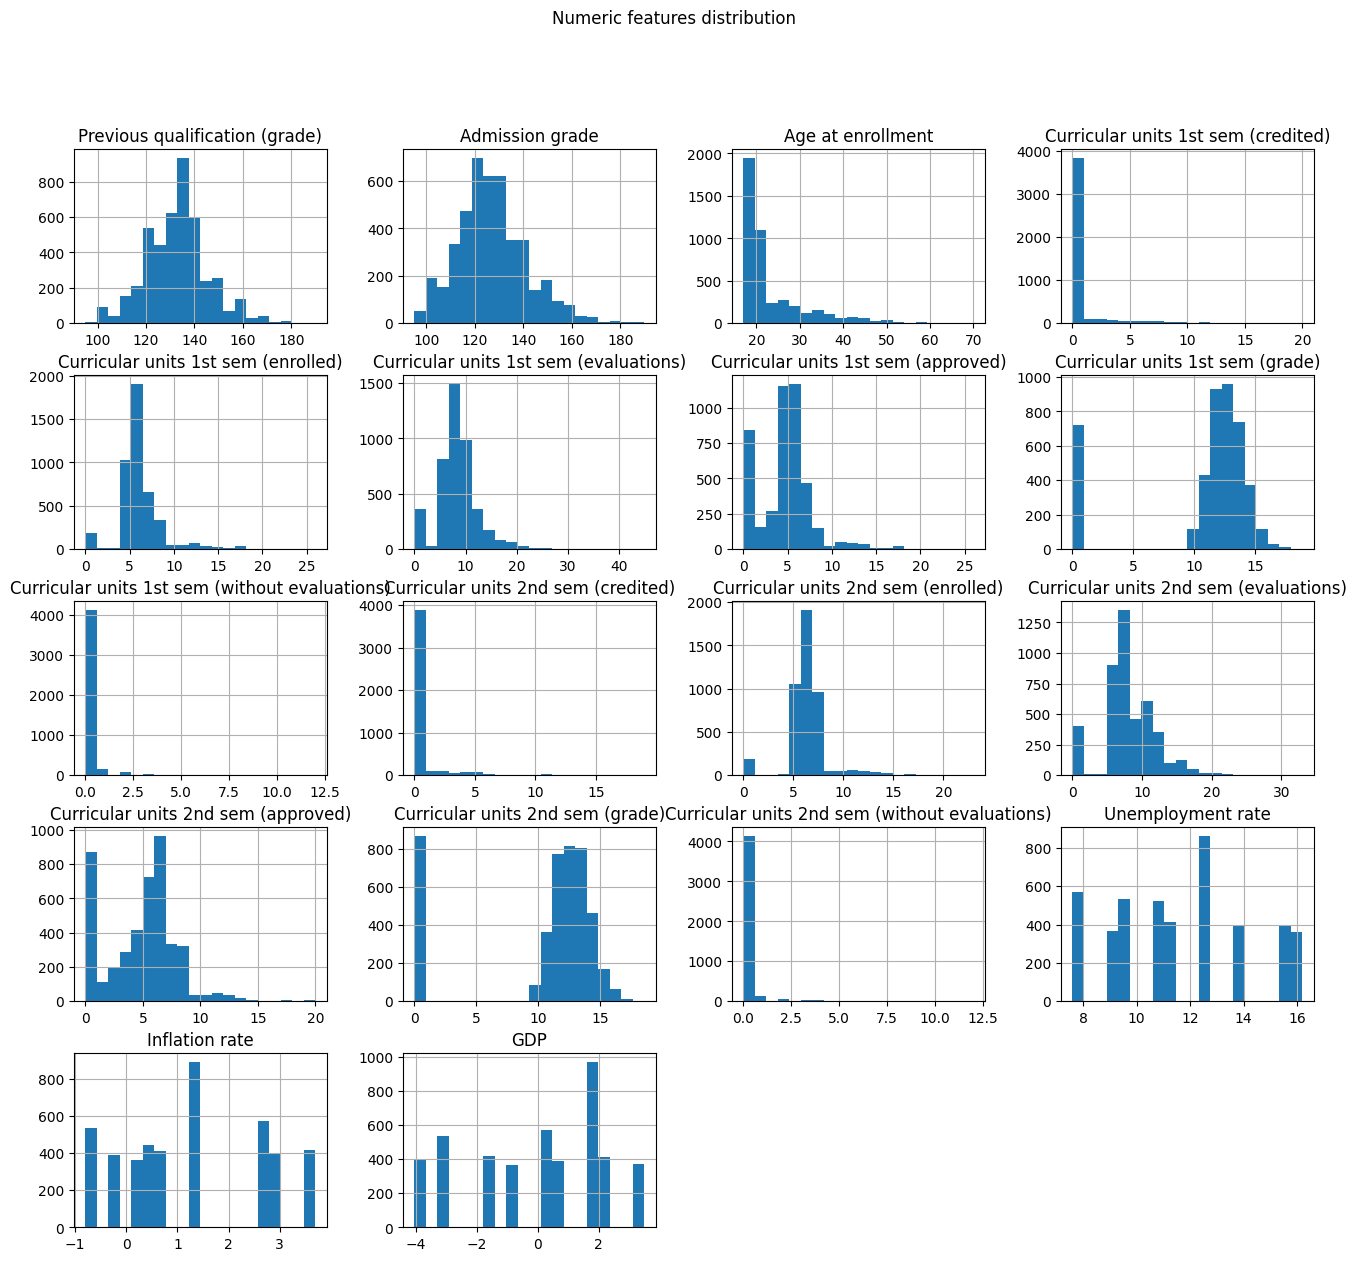

In [12]:
#Creating a histogram to visualise the data distribution for numeric columns

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

data[numeric_columns].hist(figsize=(16, 14), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()

`Previous qualification (grade)` and `Admission grade`: The distribution of previous qualification and admission grades appears approximately normal, with most values clustered around a central range. There are no significant outliers observed in this distribution.

`Age at enrollment`: The age distribution is slightly skewed to the right, with the majority of students in the typical college age range. A few older students serve as outliers.

`Curricular units 1st sem (credited)`: Most students have zero credited units, indicating few transfers or prior recognitions.

`Curricular units 1st sem (enrolled)`: The enrollment distribution shows a central peak, A few students enrolled in unusually high or low numbers of units, which are outliers.

`Curricular units 1st sem (evaluations)`: Most students have a moderate number of evaluations, suggesting regular engagement.

`Curricular units 1st sem (approved)`: This distribution shows most students successfully complete a standard number of units.

`Curricular units 1st sem (grade)`: The distribution of grades for the first semester is approximately normal, centered around a typical pass range. Outliers are minimal, suggesting consistent performance.

`Curricular units 1st sem (without evaluations)`: Most students completed all evaluations, with a few outliers

`Curricular units 2nd sem (credited)`: Similar to the first semester, the second-semester credits are mostly zero, with outliers at higher credit values, likely due to transferred credits.

`Curricular units 2nd sem (enrolled)`: The enrollment distribution for the second semester mirrors the first, with a central tendency around typical enrollment levels.

`Curricular units 2nd sem (evaluations)`: Most students have completed evaluations for their enrolled units.

`Curricular units 2nd sem (approved)`: The distribution shows most students pass a standard number of units in the second semester.

`Curricular units 2nd sem (grade)`: Grades for the second semester follow a near-normal distribution, with no notable outliers.

`Curricular units 2nd sem (without evaluations)`: Like the first semester, most students completed evaluations, with outliers where students did not complete evaluations.

`Unemployment rate`: The distribution of unemployment rates is slightly right-skewed. A few high values serve as outliers.

`Inflation rate`: The inflation rate distribution is centered around a low-to-moderate range, with a few high or negative outliers.

`GDP`: The GDP distribution shows a slight right skew, with most values in a stable range.

##Identifying Outliers

To visualise and Identify outliers, boxplot were used on all numerical variables. These visualistions helps to identify the noises and distortion in the data



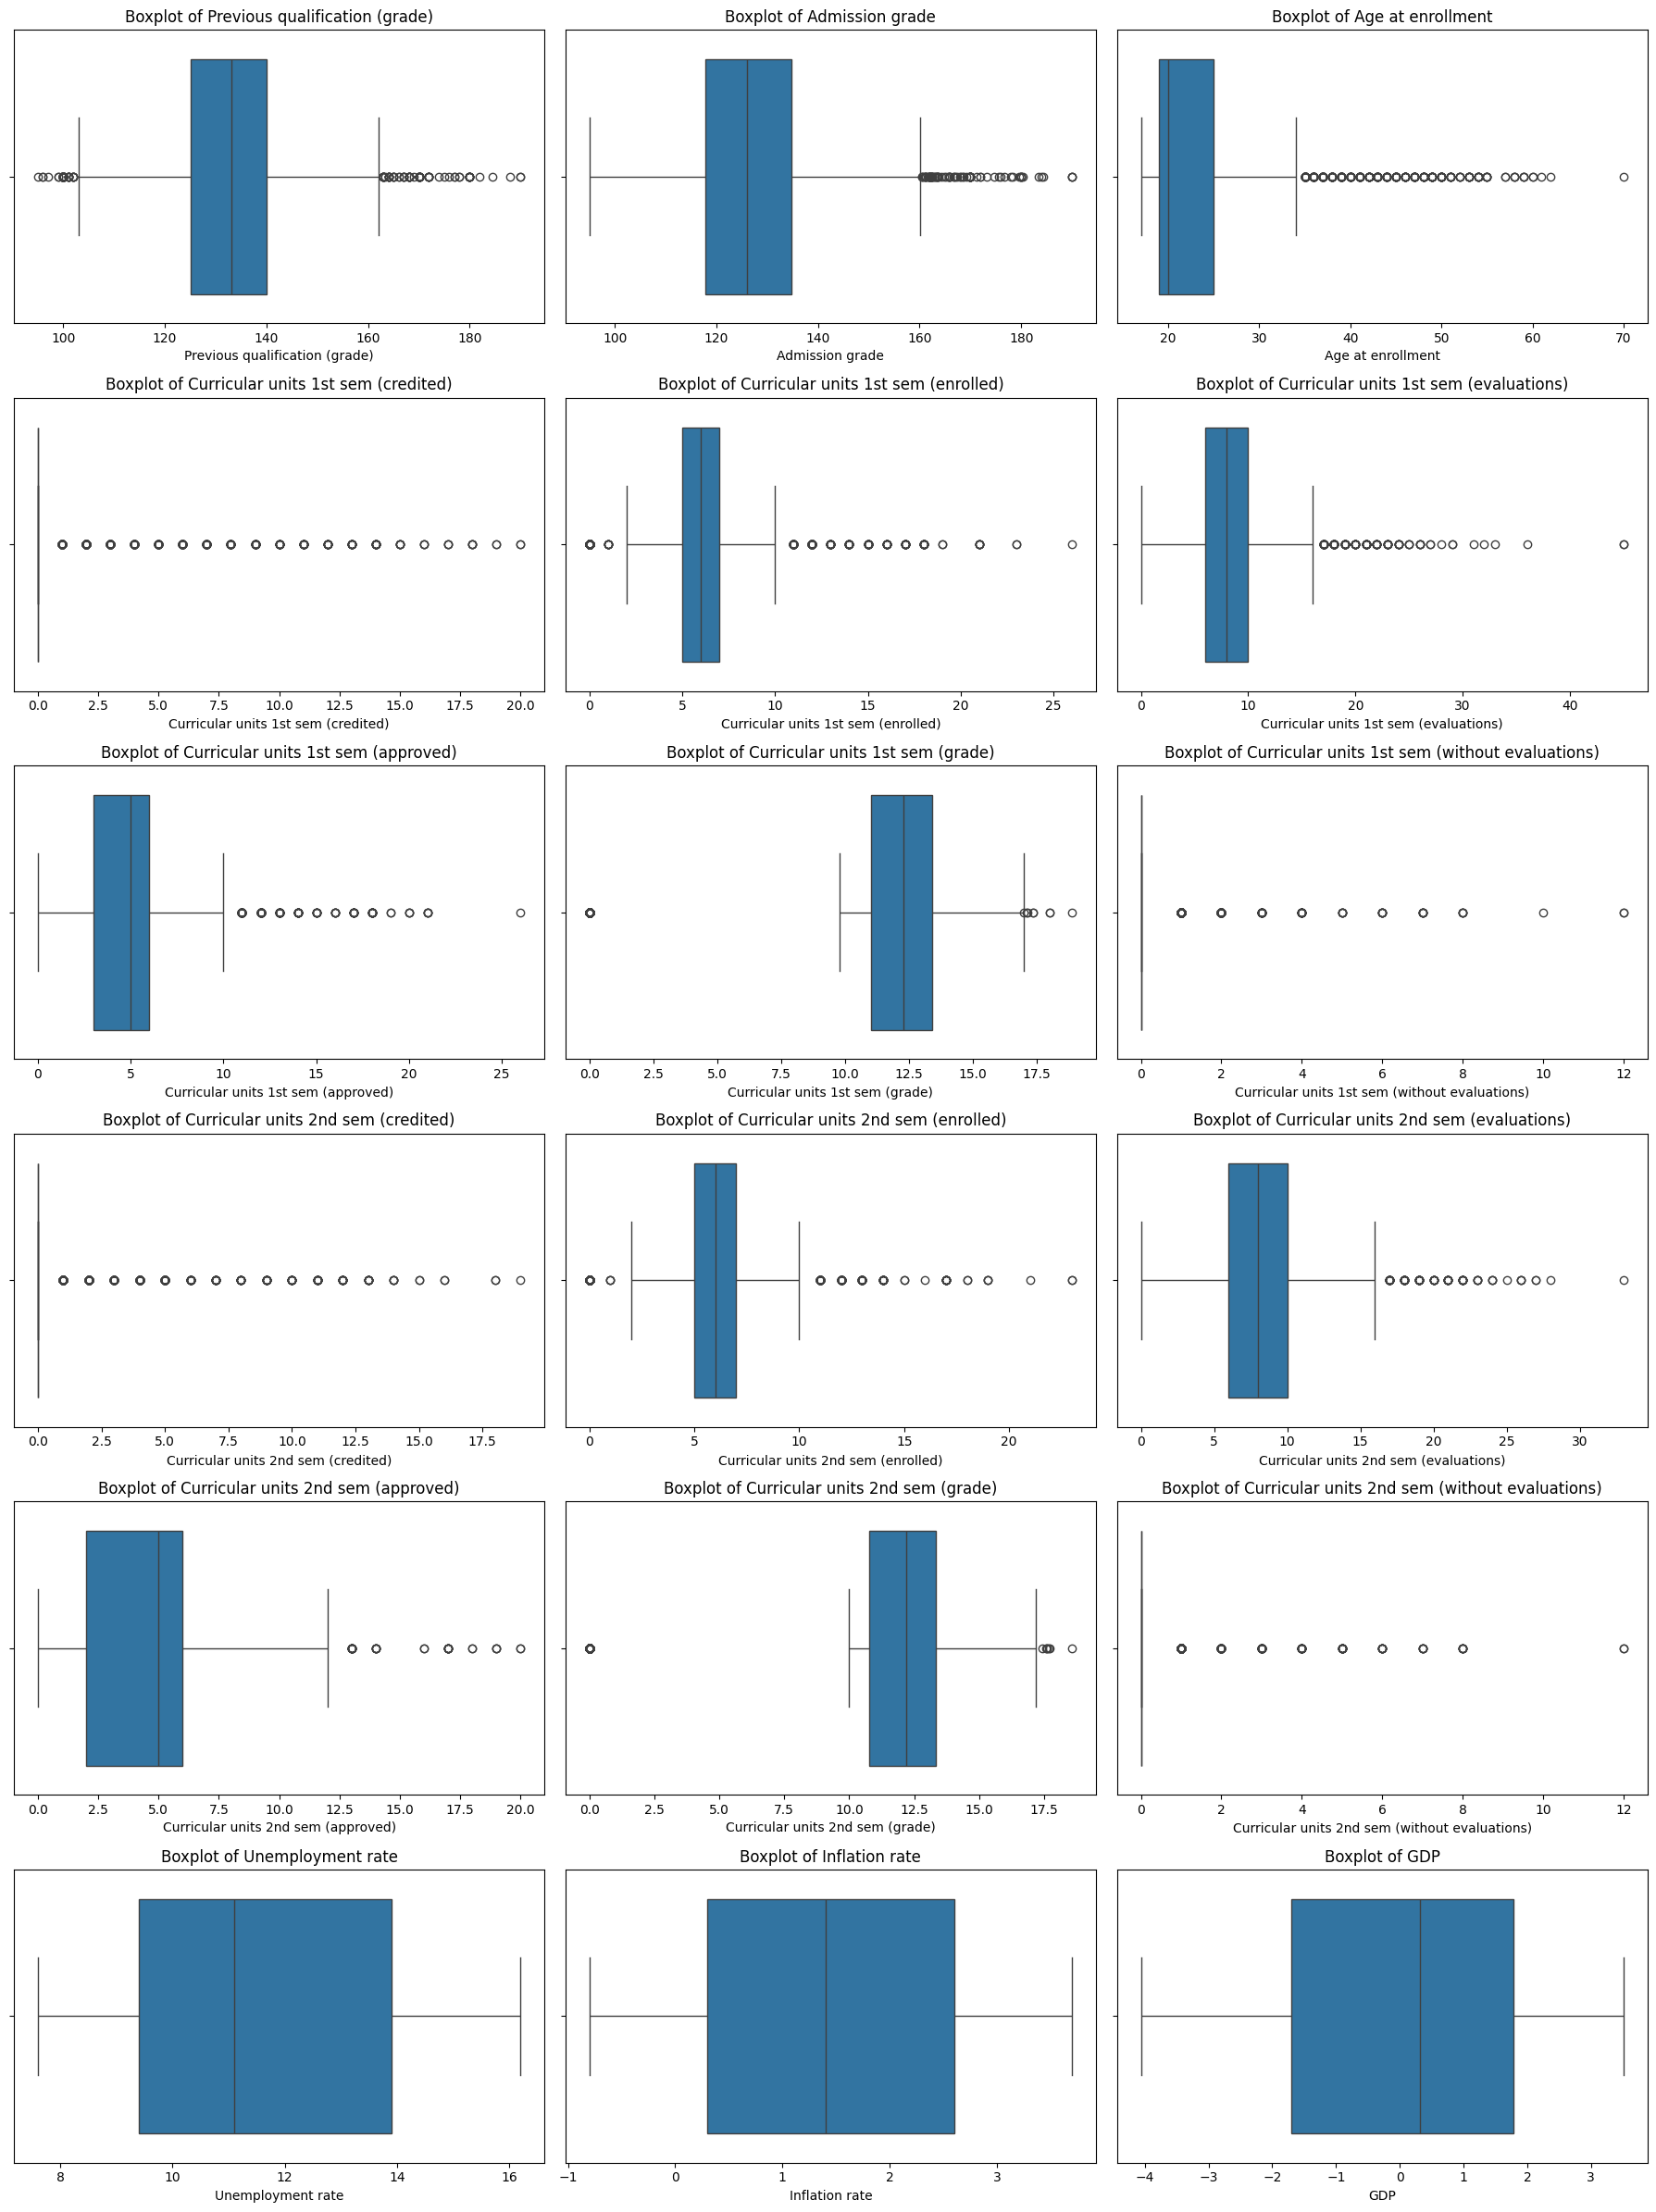

In [13]:
# Creating a boxplot for all numeric data in the dataset too spot outlier

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

plt.figure(figsize=(18, 24))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

`Previous qualification (grade) and Admission grade`: The distribution shows minor outliers on the higher end but is mostly concentrated.

`Age at enrollment`: A few outliers with higher ages indicate non-traditional students, but the data is largely consistent.

`Curricular units 1st sem (credited)`: Outliers are observed at higher values, suggesting a few students brought in more credits than average.

`Curricular units 1st sem (enrolled)`: Most data falls within a typical range with a few high outliers.

`Curricular units 1st sem (evaluations)`: Shows outliers in both high and low ranges, but they are limited.

`Curricular units 1st sem (approved)`: Outliers exist in the data

`Curricular units 1st sem (grade)`: Near-normal distribution with no major outliers.

`Curricular units 1st sem (without evaluations)`: Outliers are present for students without evaluations.

`Curricular units 2nd sem (credited)`: Contains higher outliers for credited units.

`Curricular units 2nd sem (enrolled)`: A few outliers in the high range but generally consistent.

`Curricular units 2nd sem (evaluations)`: Shows a consistent range with minor outliers on both ends.

`Curricular units 2nd sem (approved)`: Outliers for students with low approvals.

`Curricular units 2nd sem (grade)`: Data appears normal with no significant outliers.

`Curricular units 2nd sem (without evaluations)`: Minor outliers in the data distribution.

`Unemployment rate`: There is Outliers on the higher end

`Inflation rate`: Outliers are present but do not dominate the data. N

`GDP`: There are Outliers at lower GDP values


**Summary**

All variables exhibit acceptable distributions, with some outliers present; however, none are extremely skewed, so no variables require dropping based on the histogram and boxplot analyses. Each variable retains valuable information for exploratory analysis and modeling.

Variables with notable outliers, warranting further investigation to determine validity or error, include: Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), and Unemployment rate.

Summary:
Outliers will be managed using two methods based on their distribution characteristics:

Interquartile Range (IQR) Method (`for Age at enrollment`, `Curricular units 1st sem (enrolled)`, `Curricular units 1st sem (evaluations)`, and `Curricular units 2nd sem (evaluations)`): This method effectively caps outliers in nearly normal distributions, helping maintain dataset patterns without excessive skewing.

99th Percentile Capping (`for Previous qualification (grade)`, `Curricular units 1st sem (credited)`, `Curricular units 1st sem (without evaluations)`, `Curricular units 2nd sem (credited)`, and `Unemployment rate`): This method is suitable for skewed data, especially in columns where outliers represent valid but extreme values, allowing the data to retain its natural distribution.

In [14]:
# Handling outliers - Capping outliers using Interquartile Range (IQR) method

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

# Columns selected for IQR method based on near-normal distribution
iqr_columns = ['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']
for col in iqr_columns:
    data = cap_outliers_iqr(data, col)

print(data.head())

  Marital status                  Application mode Application order  \
0         single    2nd phase - general contingent        5 - choice   
1         single  International student (bachelor)        1 - choice   
2         single    1st phase - general contingent        5 - choice   
3         single    2nd phase - general contingent        2 - choice   
4        married                 Over 23 years old        1 - choice   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese

In [15]:
# Handling outliers - Capping outliers using 99th percentile-based method

def cap_outliers_percentile(data, column):
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    return data

# Columns selected for 99th percentile method based on skewed distribution
percentile_columns = ['Previous qualification (grade)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Unemployment rate']
for col in percentile_columns:
    data = cap_outliers_percentile(data, col)

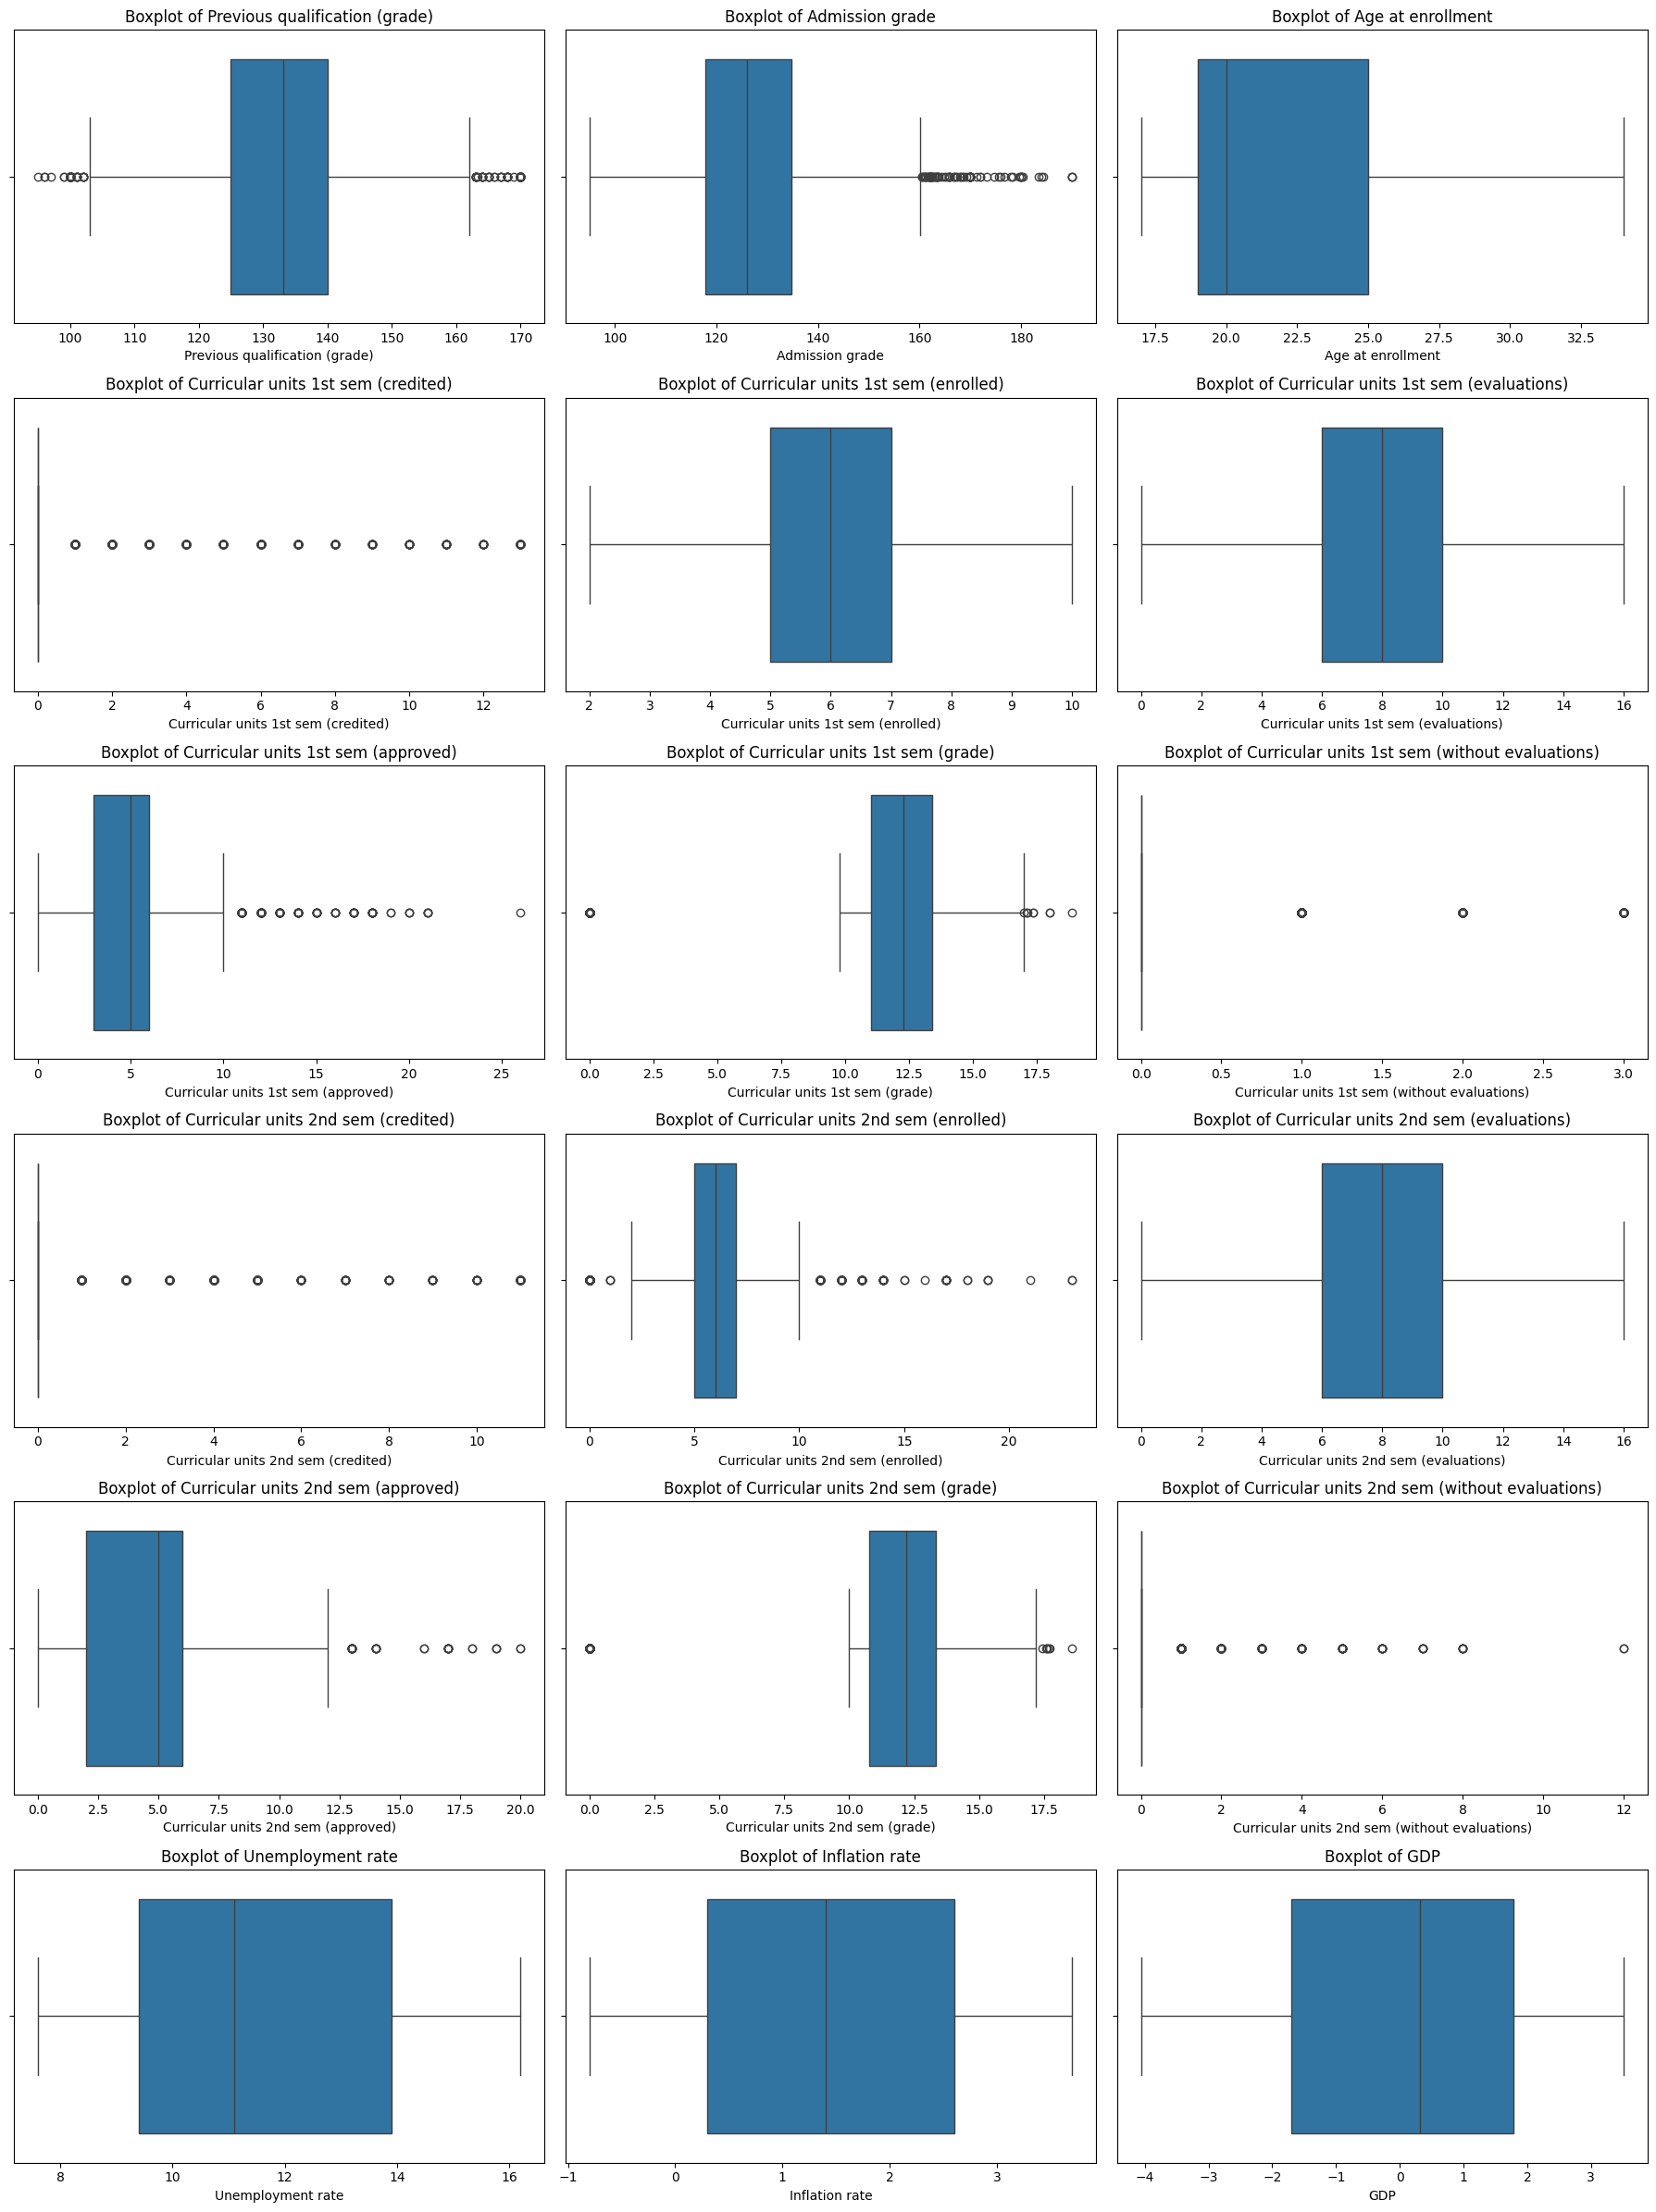

In [16]:
# Re-visualising the numeric columns after treating outliers

numeric_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
                   'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                   'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                   'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)',
                   'Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

plt.figure(figsize=(18, 24))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(6, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

The dataset has now been cleaned, making it more reliable for further analysis.

In [17]:
data.describe()

Previous qualification (grade)  Admission grade  Age at enrollment  \
count                     4424.000000      4424.000000        4424.000000   
mean                       132.561008       126.978119          22.457052   
std                         13.015622        14.482001           5.409813   
min                         95.000000        95.000000          17.000000   
25%                        125.000000       117.900000          19.000000   
50%                        133.100000       126.100000          20.000000   
75%                        140.000000       134.800000          25.000000   
max                        170.000000       190.000000          34.000000   

       Curricular units 1st sem (credited)  \
count                          4424.000000   
mean                              0.689195   
std                               2.230330   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              13.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              6.146022   
std                               1.578002   
min                               2.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              10.000000   

       Curricular units 1st sem (evaluations)  \
count                             4424.000000   
mean                                 8.136528   
std                                  3.673159   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 16.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.706600                         10.640822   
std                               3.094238                          4.843663   
min                               0.000000                          0.000000   
25%                               3.000000                         11.000000   
50%                               5.000000                         12.285714   
75%                               6.000000                         13.400000   
max                              26.000000                         18.875000   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.112342   
std                                          0.468585   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          3.000000   

       Curricular units 2nd sem (credited)  \
count                           4424.00000   
mean                               0.52283   
std                                1.79126   
min                                0.00000   
25%                                0.00000   
50%                                0.00000   
75%                                0.00000   
max                               11.00000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                    

## Univariate Descriptive Analysis

<ipython-input-18-3bb8c69fe006>:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


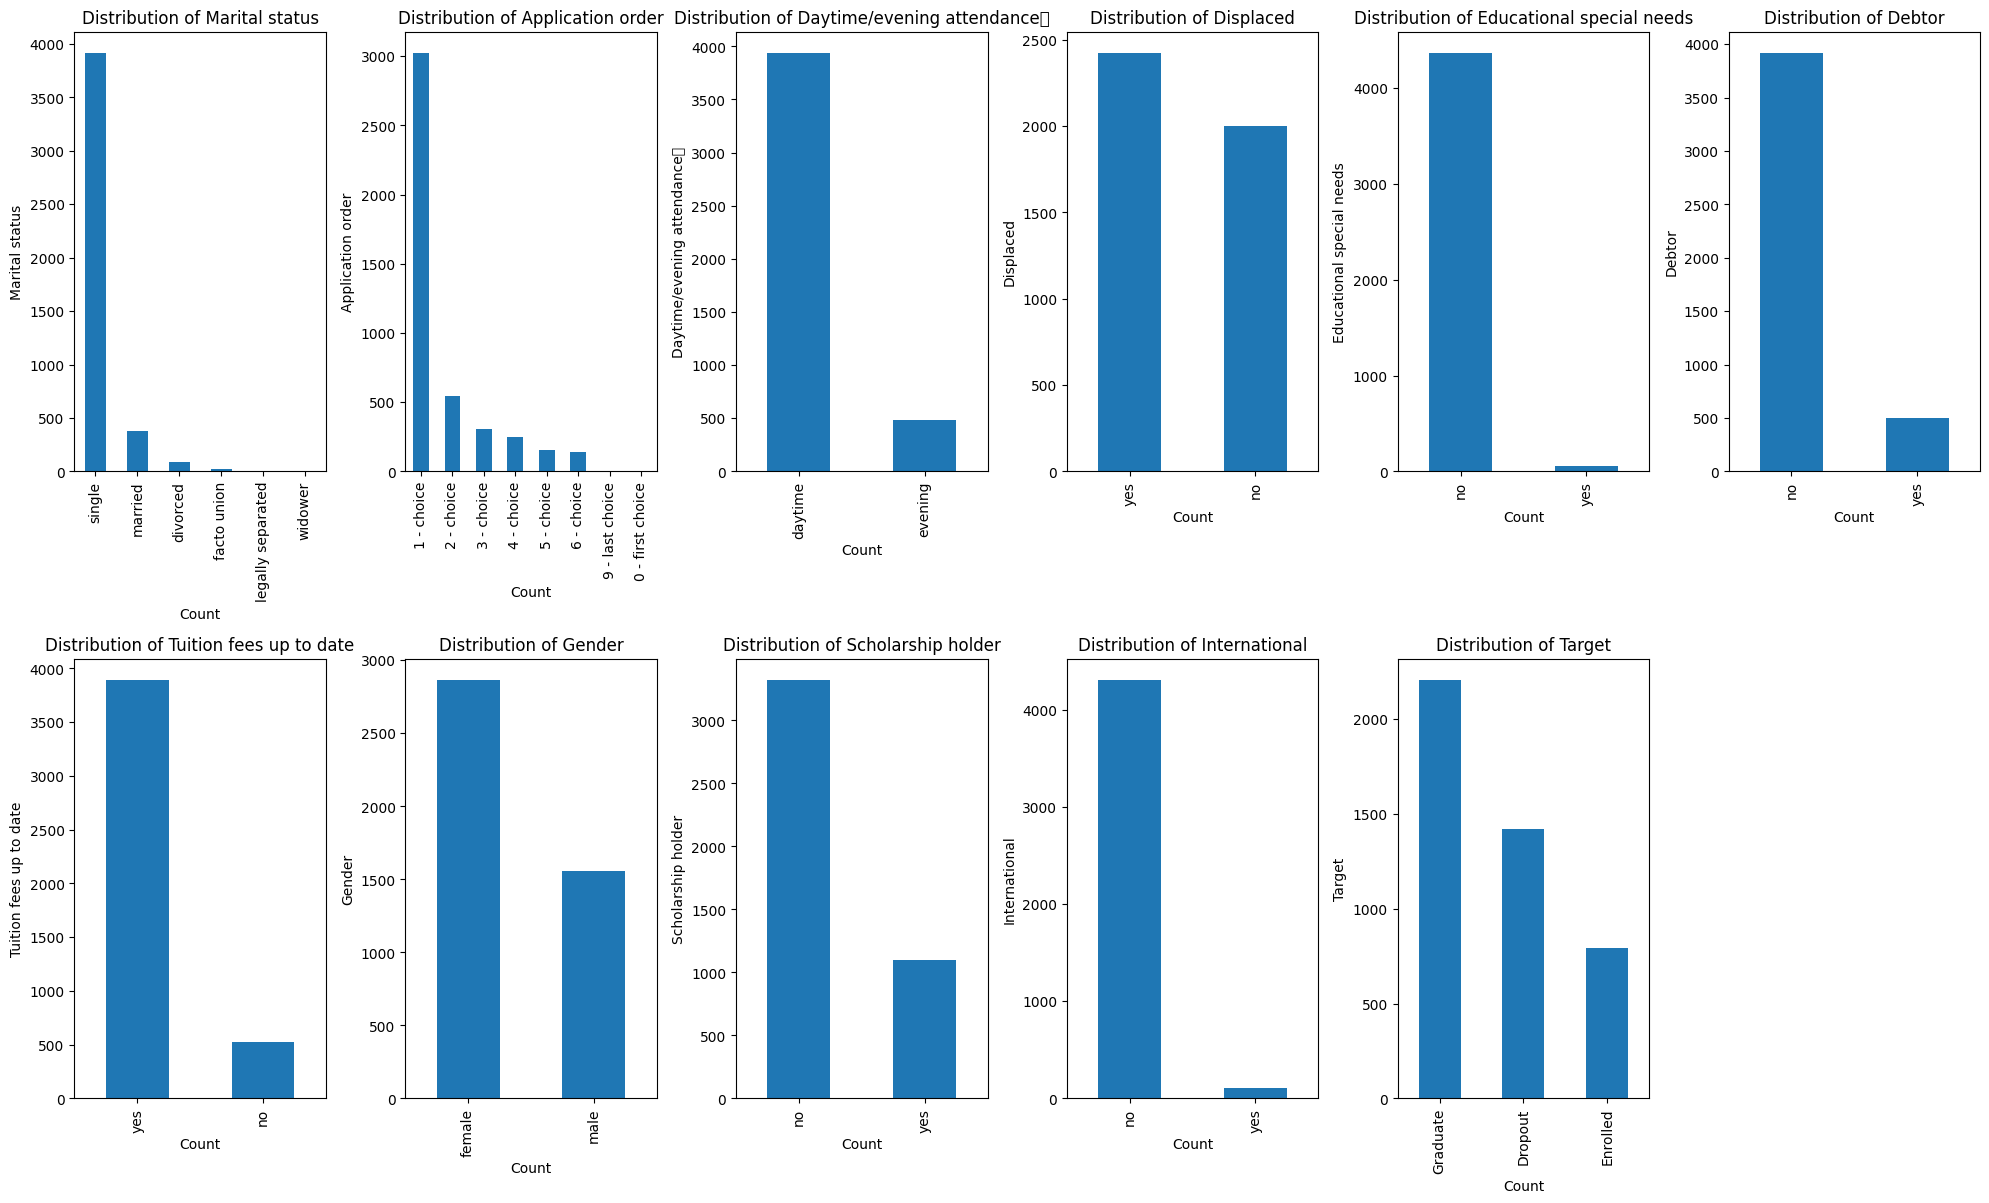

In [18]:
# List of categorical column 1
categorical_column1 = [
    'Marital status', 'Application order', 'Daytime/evening attendance\t',
   'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'
]

plt.figure(figsize=(20, 30))

# Looping through each categorical column to create a bar chart
for i, col in enumerate(categorical_column1, 1):
    plt.subplot(5, 6, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

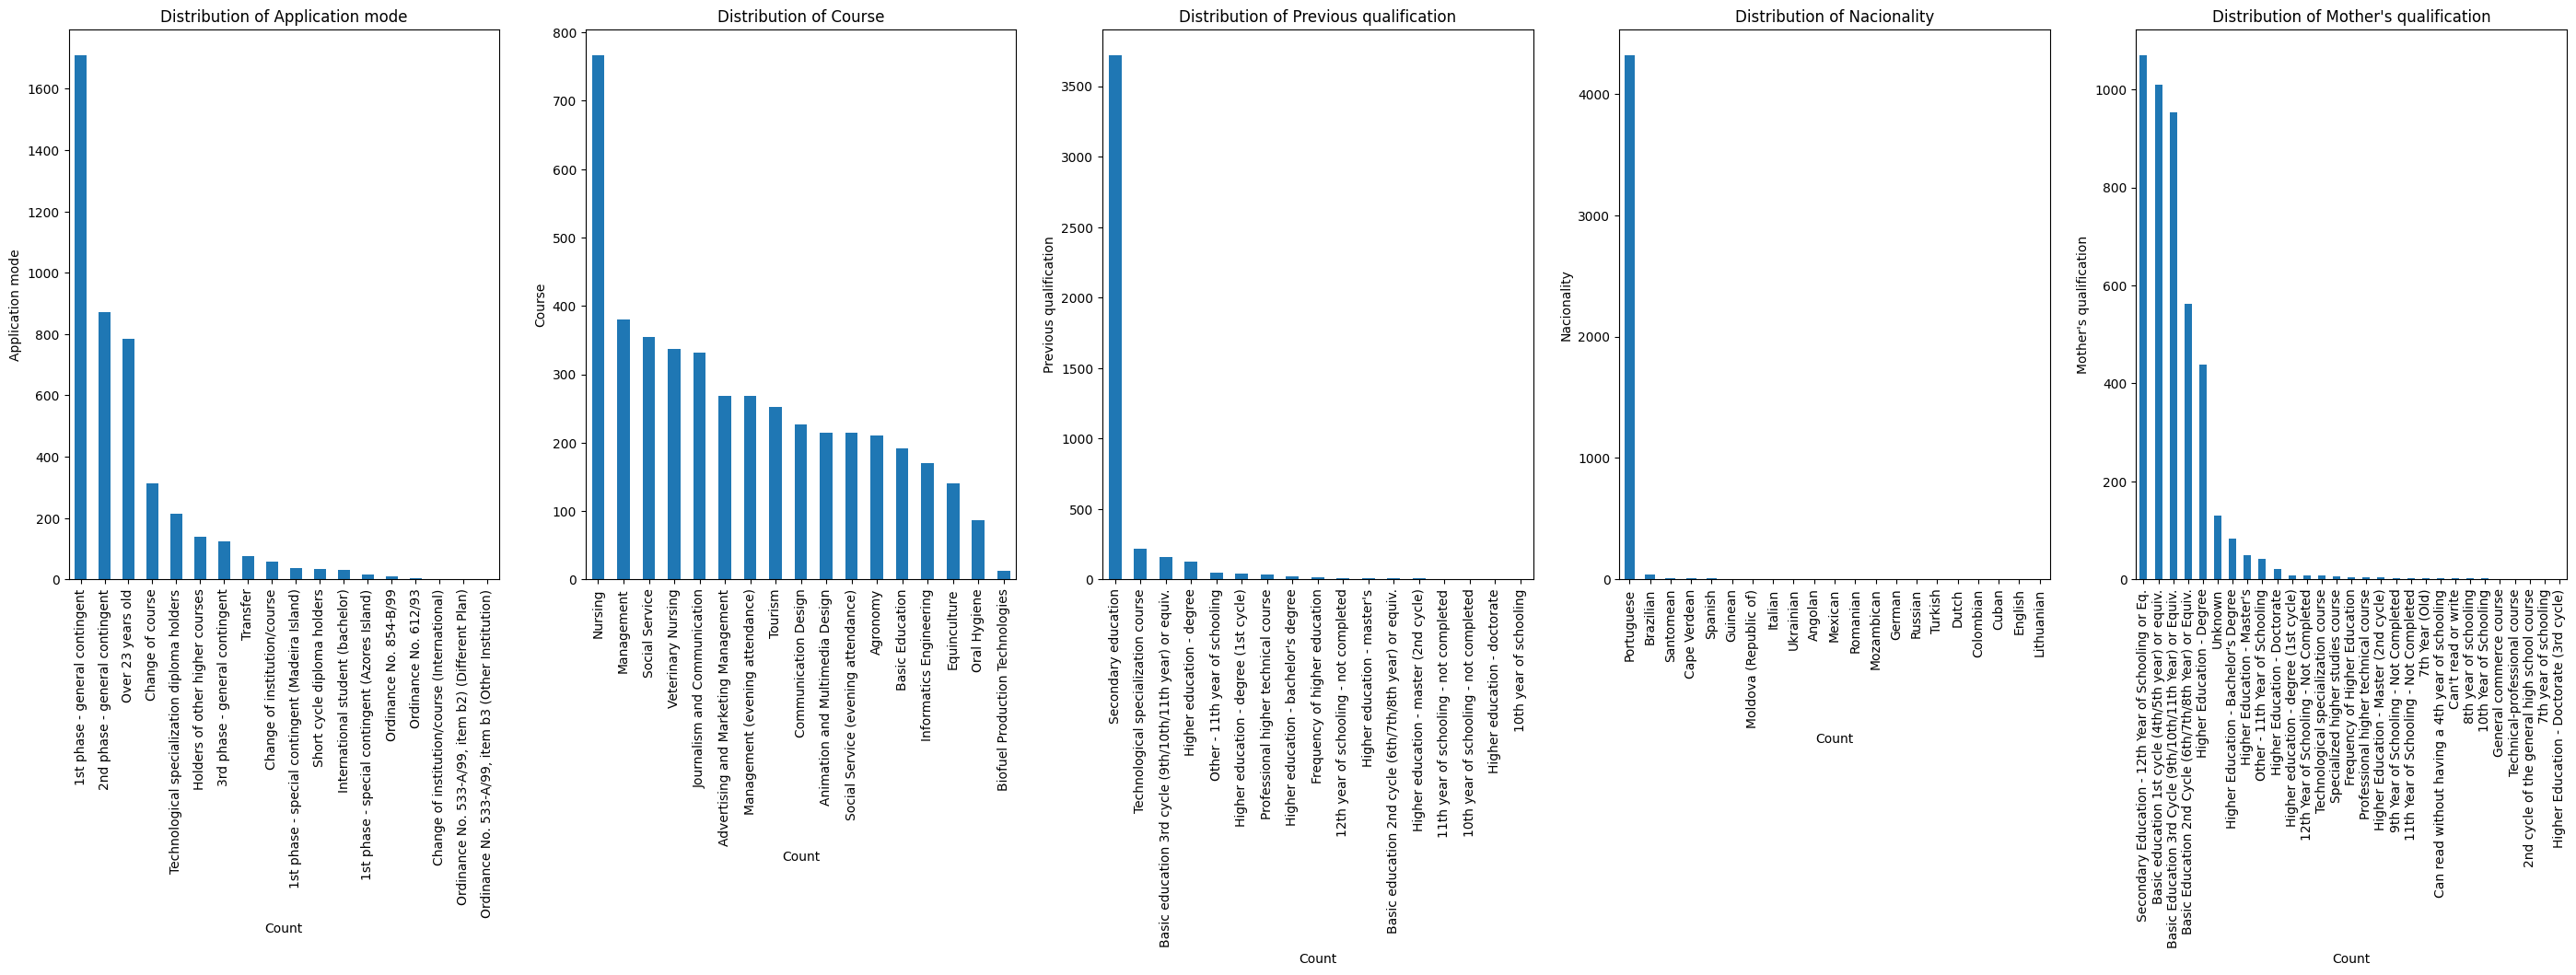

In [19]:
# List of categorical column 2
categorical_column2 = ['Application mode', 'Course',
    'Previous qualification', 'Nacionality', "Mother's qualification"

]

categorical_column3 = ["Father's qualification",
    "Mother's occupation", "Father's occupation"
]

plt.figure(figsize=(35, 45))

# Looping through each categorical column to create a bar chart
for i, col in enumerate(categorical_column2, 1):
    plt.subplot(5, 5, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.show()

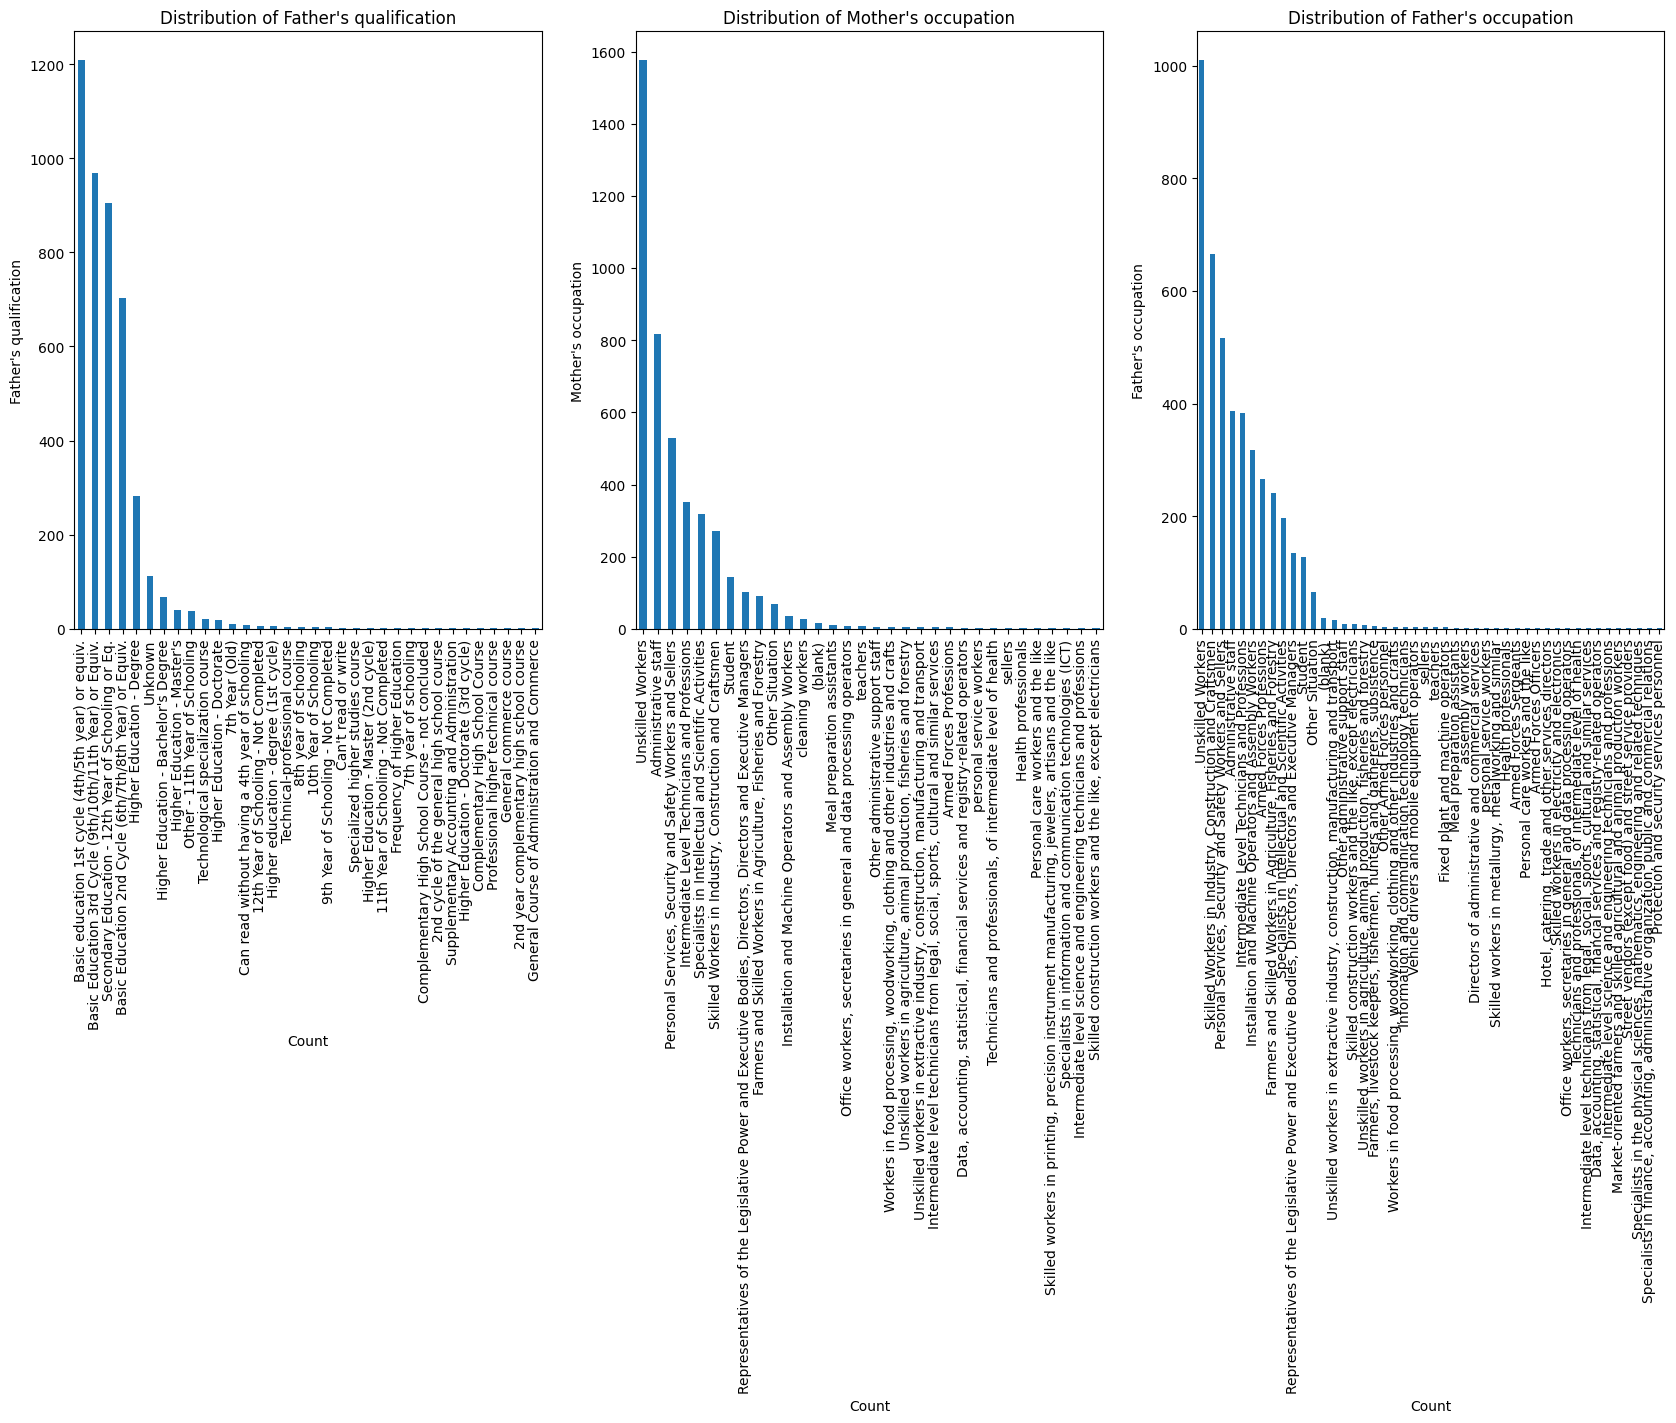

In [20]:
plt.figure(figsize=(35, 45))

# Looping through each categorical column to create a bar chart
for i, col in enumerate(categorical_column3, 1):
    plt.subplot(5, 5, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.show()

`Marital status`: The majority are single, with the least being widowers, suggesting single students may be the primary demographic. Marital status may not strongly predict outcomes if most students are similar.

`Application mode`: Majority are General contingent while specialized modes (e.g., ordinance categories) is the least. Application mode could signal applicant diversity or selection bias.

`Application order`: Majority of the students made First-choice applications dominate, indicating students primarily enroll in preferred courses.

`Course`: A few courses, like Informatics Engineering, have the highest enrollment, while niche courses have minimal representation. Course selection may impact dropout/graduation rates due to course-specific factors.

`Daytime/evening attendance`: Most students attend daytime; evening students are a minority. Attendance type may impact model performance due to differences in schedule demands.

`Previous qualification`: Secondary education is most common, with specialized qualifications being least common.

`Nationality`: Portuguese students dominate, with limited representation from other nationalities. Models may reflect biases toward local demographics.

`Mother's qualification`: Most students have mother qualificationnas secondary education, with higher qualifications (e.g., master's) beng least.  Parental education may only slightly impact academic outcomes.

`Father's qualification`: Similar to mother's qualification, secondary education dominates.

`Mother's occupation`: Unskilled workers are the majority, with specialists being fewer. Socioeconomic status could influence dropout or engagement.

`Father's occupation`: Similar trend with unskilled workers dominating.

`Displaced`: Most students are not displaced, indicating limited geographic relocation.

`Educational special needs`: Majority do not have special needs,

`Debtor`: Few students have debt, indicating financial stability among most students. Debt may have a minimal role in dropout prediction.

`Tuition fees up to date`: Most are up-to-date, showing good financial compliance. This variable may be a strong predictor. Unpaid fees may be a risk indicator for dropout.

`Gender`: Male students slightly dominate, with a balanced gender distribution. Gender may be relevant if related to academic persistence or performance trends.

`Scholarship holder`: Non-scholarship holders dominate, potentially indicating limited financial aid.

`International`: Majority are local students, with minimal international representation.

`Target`: Graduation is most common, with dropout rates relatively low. There is target class imbalance which may require handling in for model to perform well.

##Bivariate Analysis

This analysis is done to understand the relationship between the features and the target variables. This will help identify important features that can be used in our model

<ipython-input-21-0646f6abca46>:16: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


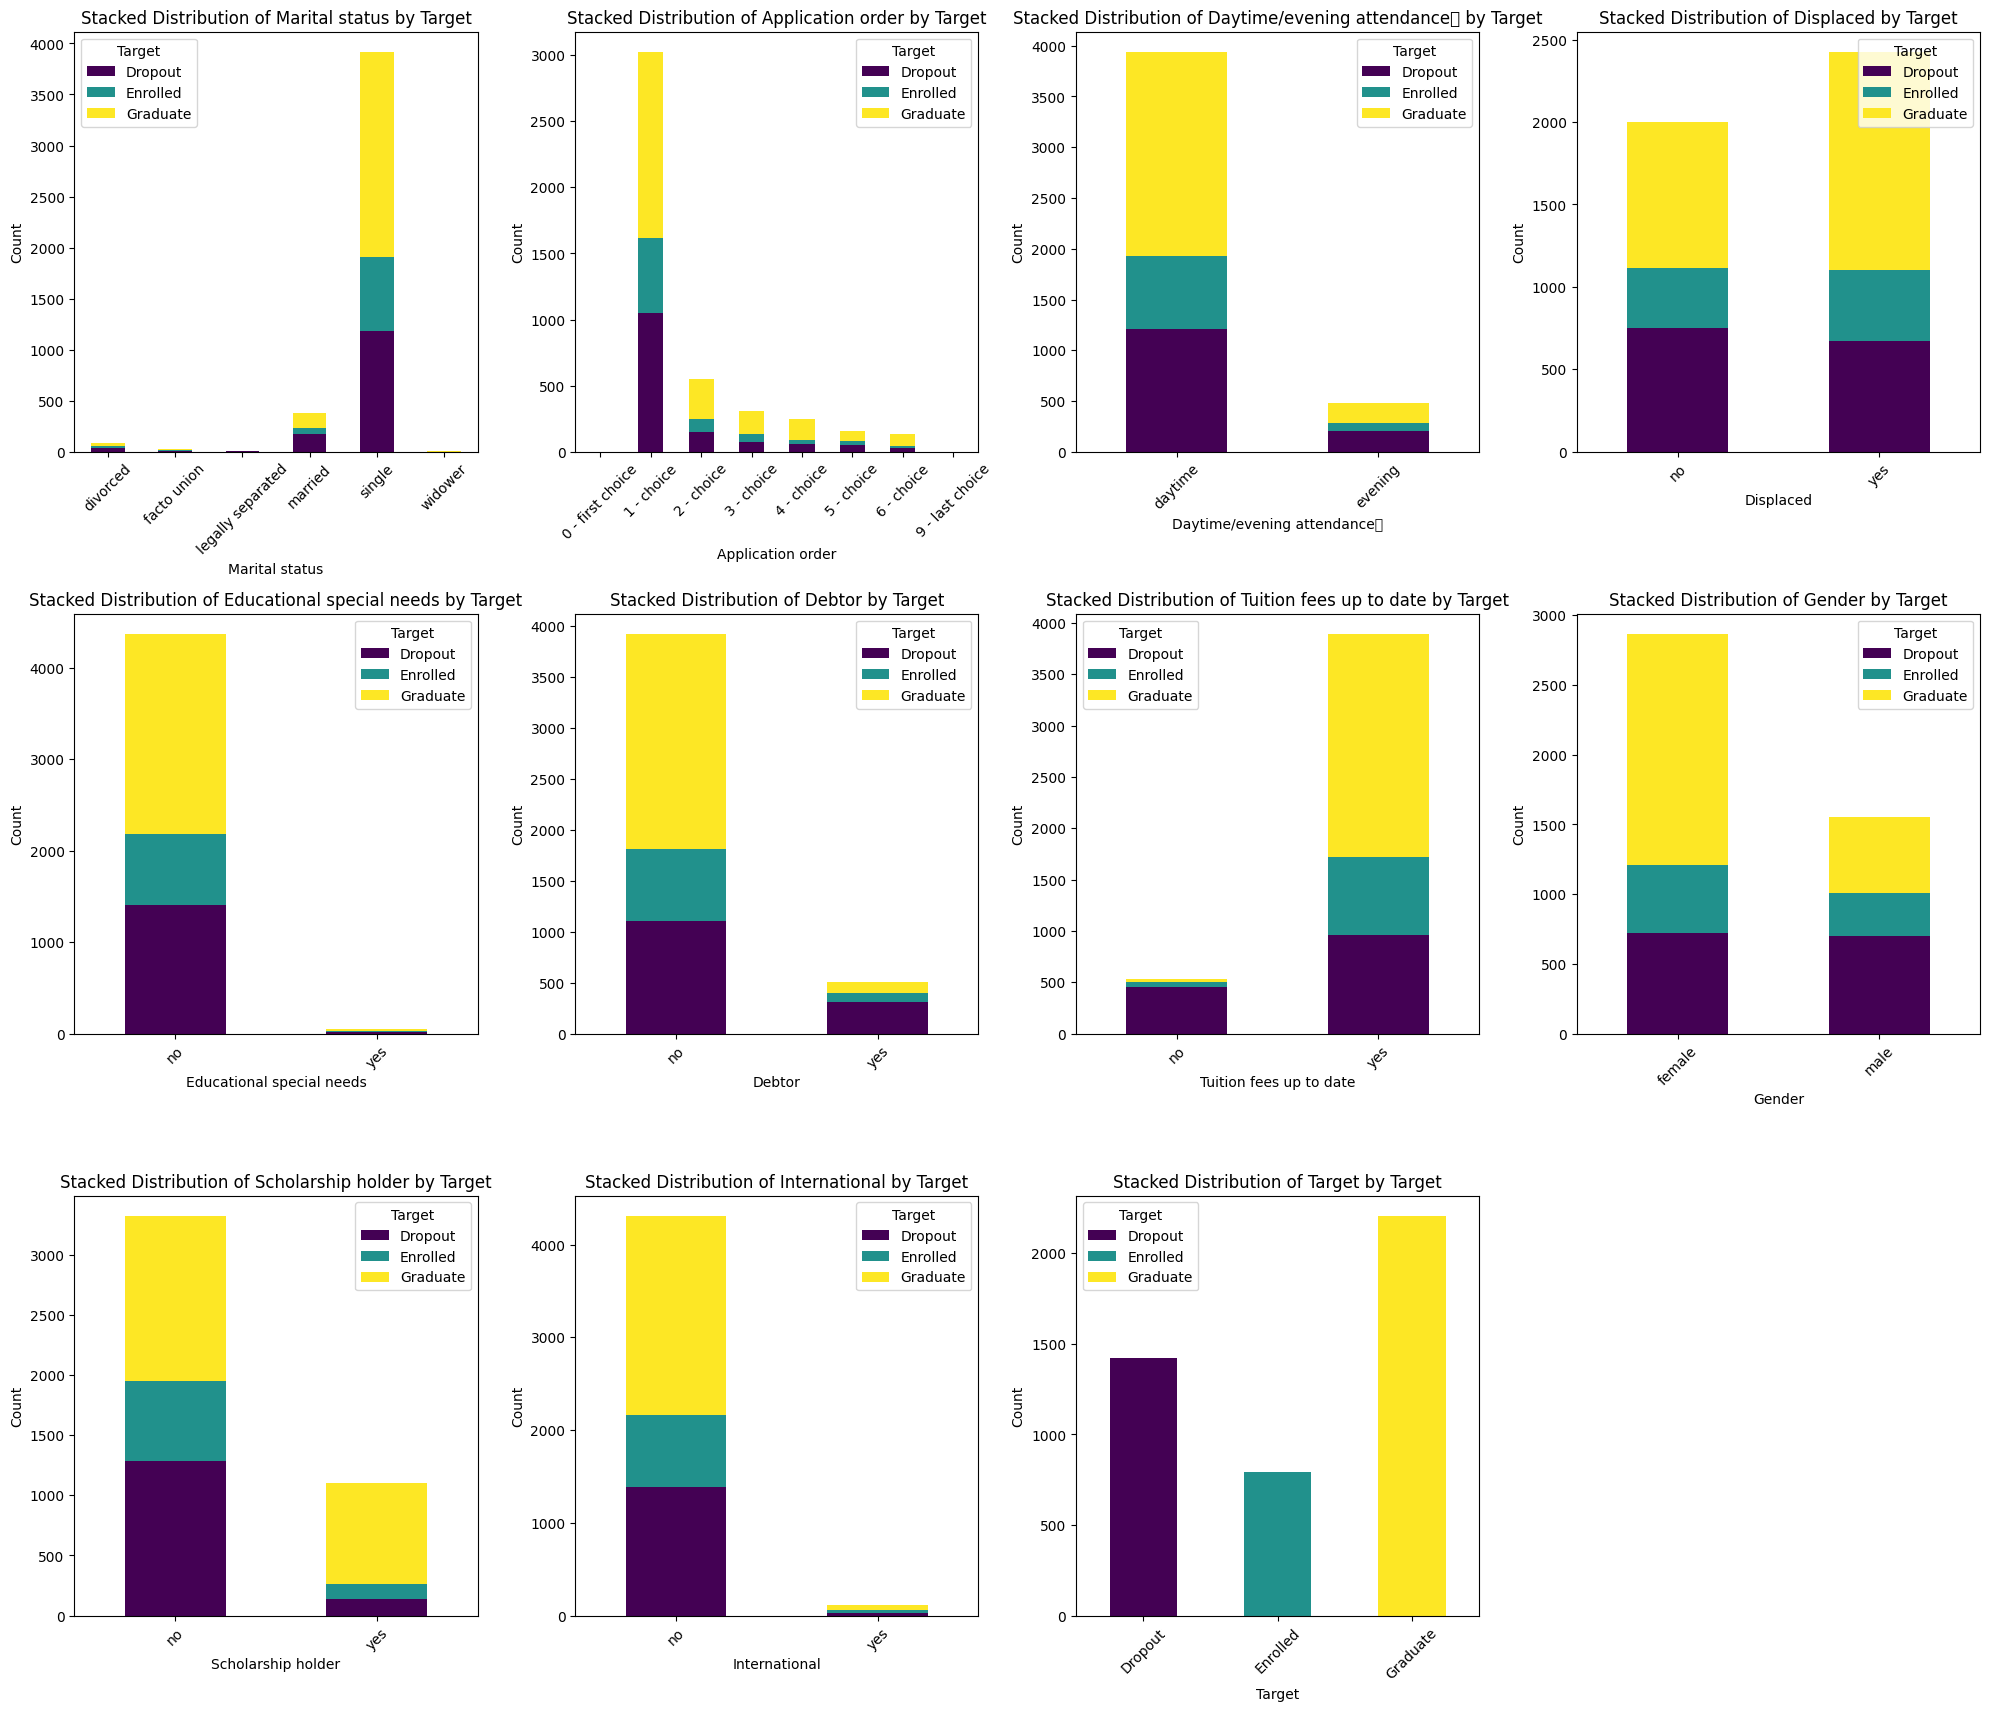

In [21]:
plt.figure(figsize=(20, 28))

# Looping through each categorical 1 to create a stacked bar chart
for i, col in enumerate(categorical_column1, 1):
    plt.subplot(5, 4, i)

    stacked_data = data.groupby([col, 'Target']).size().unstack(fill_value=0)
    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    plt.title(f'Stacked Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

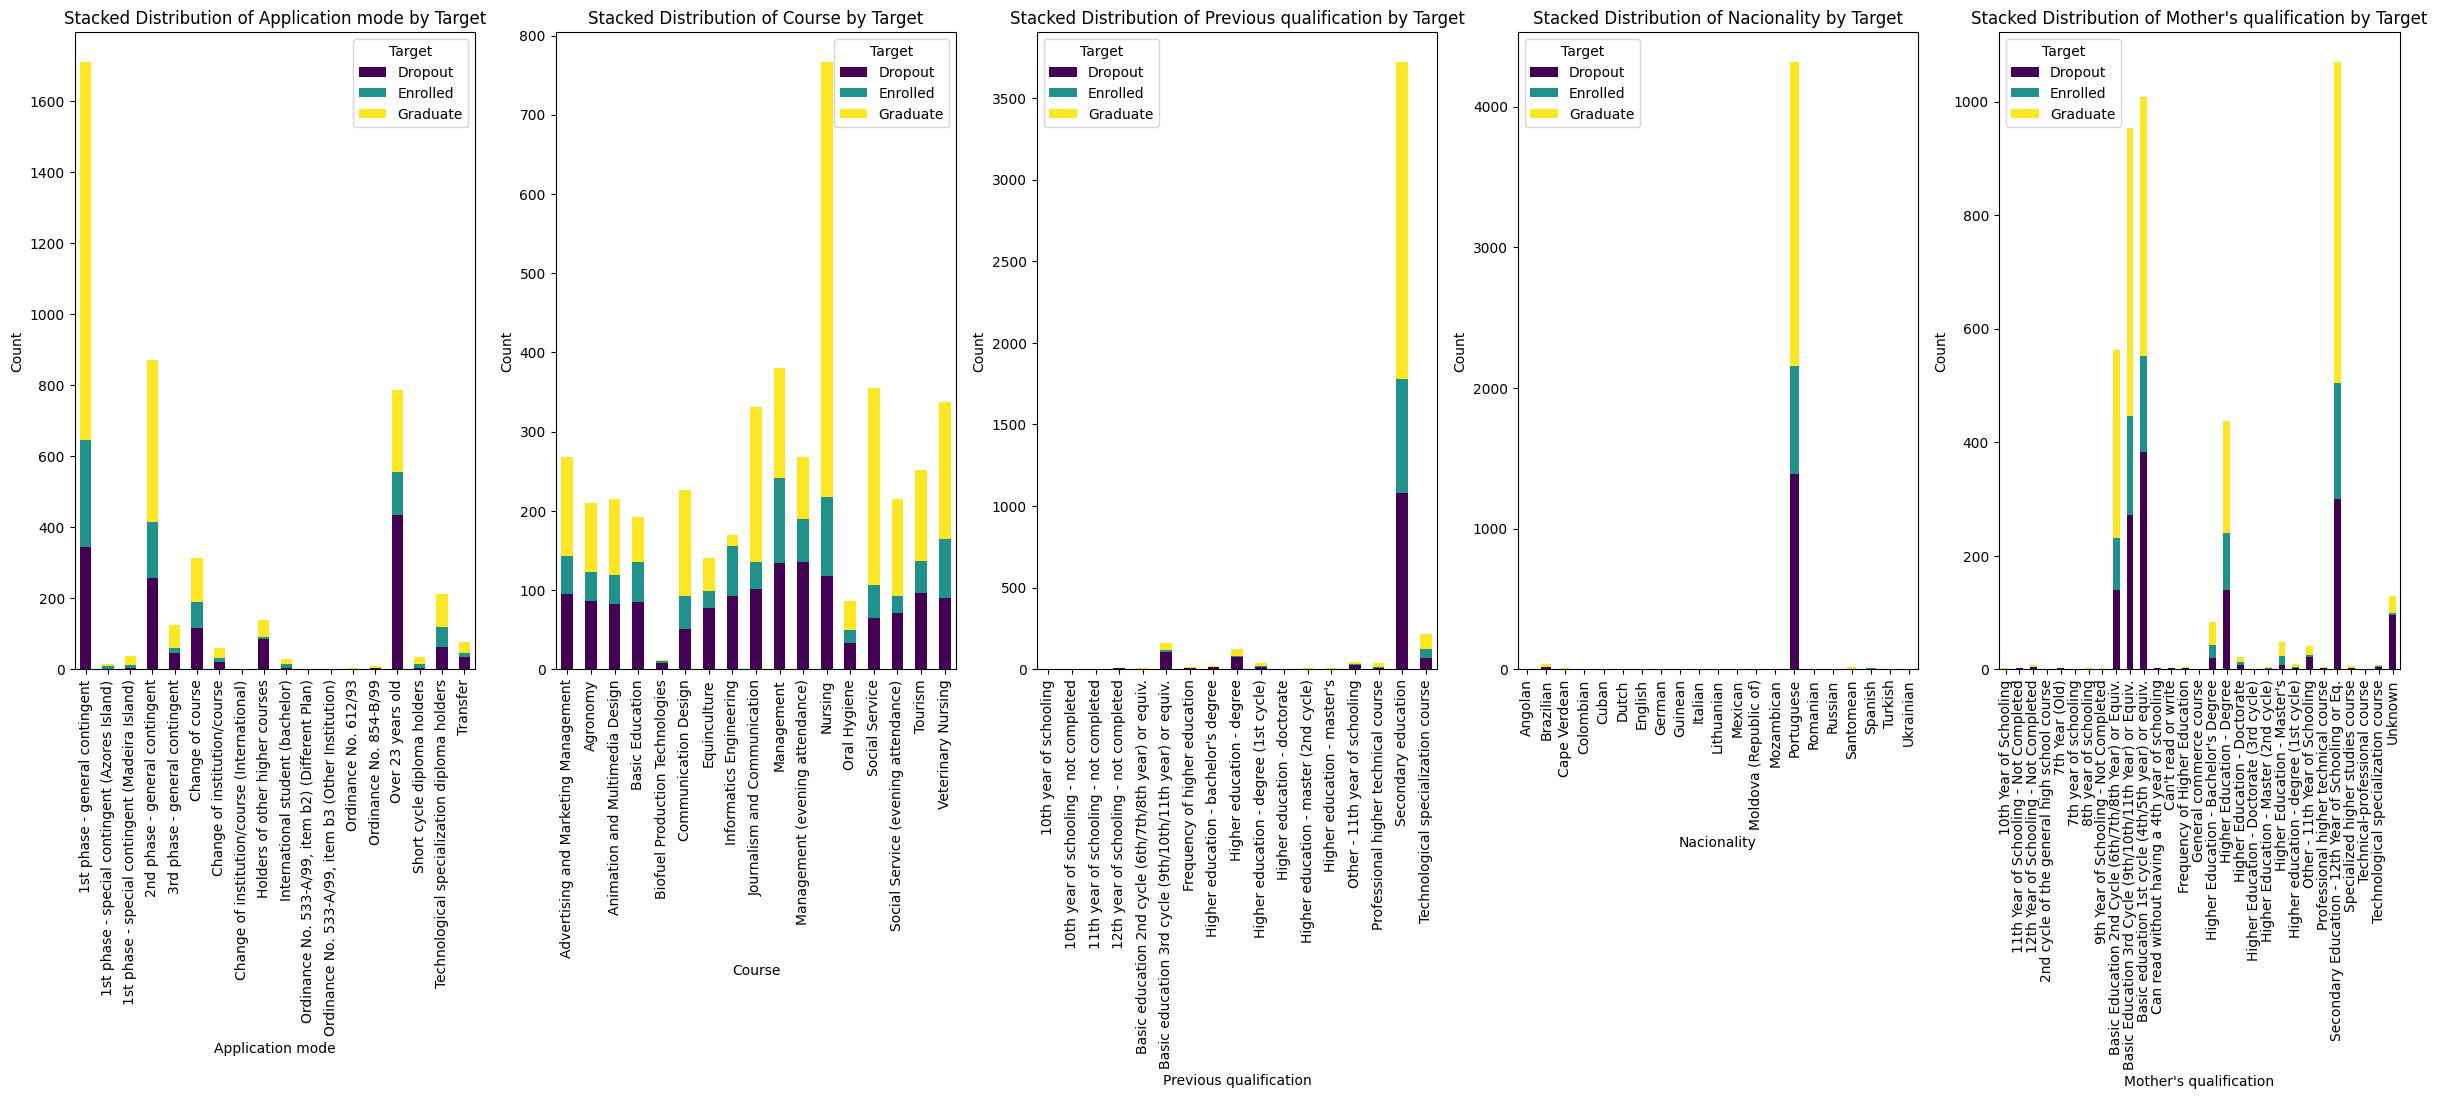

In [22]:
plt.figure(figsize=(30, 48))

# Looping through each categorical 2 to create a stacked bar chart
for i, col in enumerate(categorical_column2, 1):
    plt.subplot(5, 5, i)

    stacked_data = data.groupby([col, 'Target']).size().unstack(fill_value=0)
    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    plt.title(f'Stacked Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks()

plt.show()

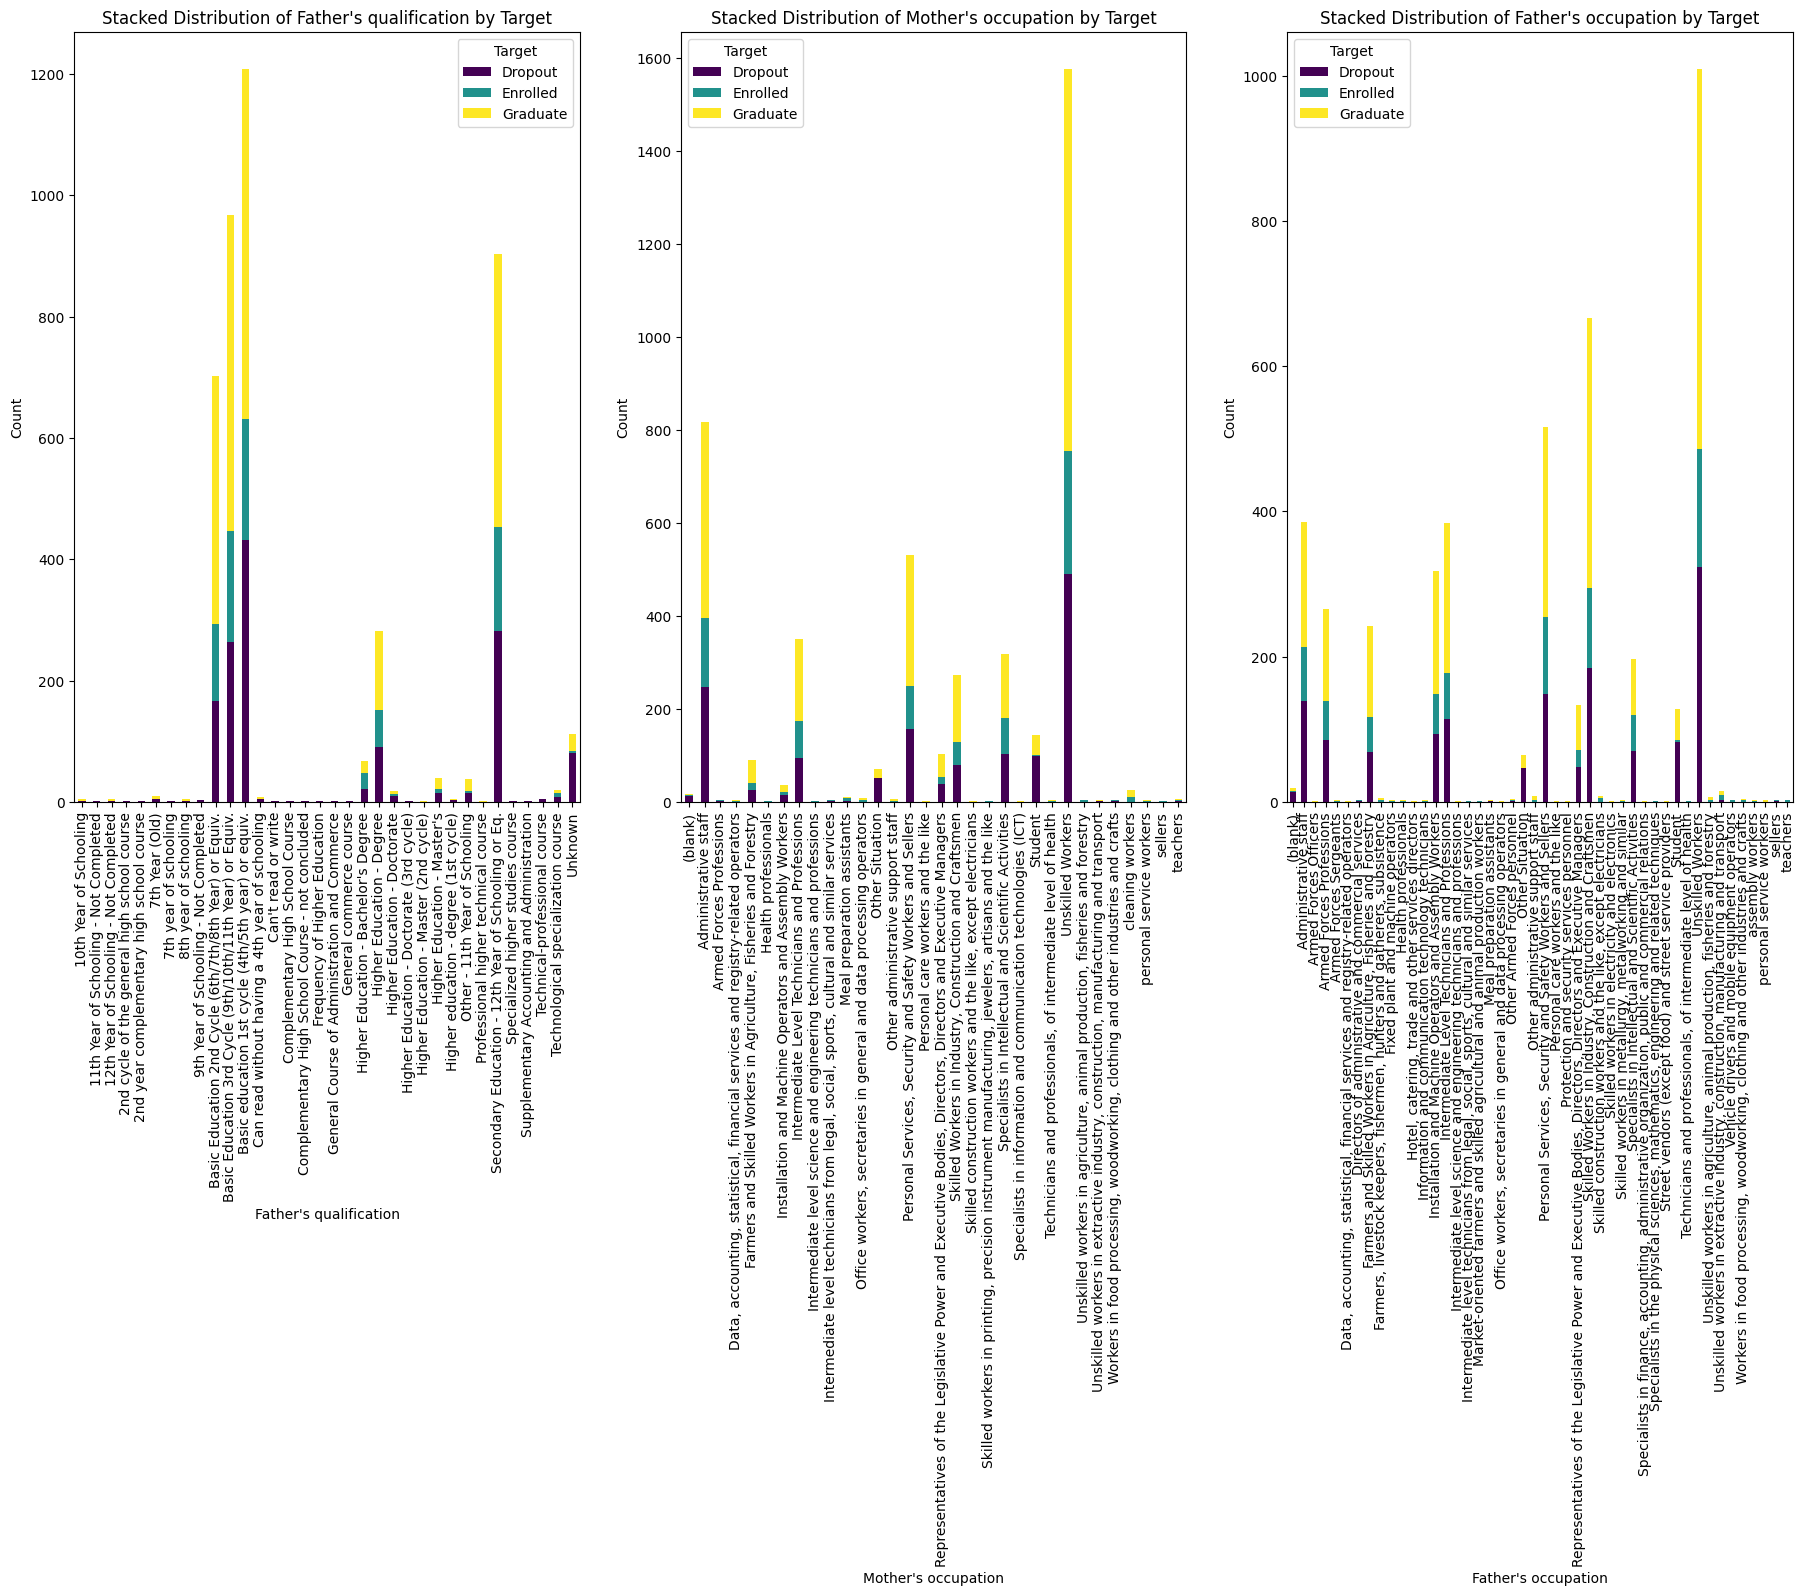

In [23]:
plt.figure(figsize=(30, 58))

# Looping through each categorical 2 to create a stacked bar chart
for i, col in enumerate(categorical_column3, 1):
    plt.subplot(5, 4, i)

    stacked_data = data.groupby([col, 'Target']).size().unstack(fill_value=0)
    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    plt.title(f'Stacked Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks()

plt.show()

`Marital status`: Single students contribute the most to all target outcomes, with widowers contributing the least. Marital status may have limited predictive power due to a dominant single category.

`Application mode`: General contingent applications lead to the highest graduation rates, while special contingents have less impact. Implication: Application mode could indicate background diversity that influences outcomes.

`Application order`: First-choice applicants primarily drive graduation, while last-choice applications show a slight increase in dropouts. Implication: Students' choice rank could be linked to engagement and persistence.

`Course`: Courses like Informatics and Management have high graduation rates, while niche courses show more variability. Course selection might be a significant predictor in the model

`Daytime/evening attendance`: Daytime students mostly graduate, while evening students show a minor increase in dropout rates. Attendance type may correlate with student availability and success.

`Previous qualification`: Secondary education is most common across all outcomes, with advanced qualifications contributing less. A homogeneous background could reduce this feature's importance.

`Nationality`: Portuguese students dominate all outcomes, with minimal input from other nationalities. Hence, Nationality may have limited impact in the model

`Mother's qualification`: Secondary-educated mothers are most associated with graduates, while higher qualifications show limited contribution. Mother's qualification could modestly indicate socioeconomic factors affecting outcomes.

`Father's qualification`: Similar trend as mother's qualification, with secondary education as the most influential.

`Mother's occupation`: Unskilled workers are linked to graduates, while specialists contribute less overall. Mother's occupation may reflect socioeconomic status with minor predictive value.

`Father's occupation`: Unskilled occupations dominate graduation rates, with professional roles having minimal impact. Father's occupation may have a weak link to student outcomes.

`Displaced`: Non-displaced students drive graduation, while displaced students show slight dropout risk.Displacement status could be a minor risk factor.

`Educational special needs`: Majority do not have special needs, with limited dropout among those who do.

`Debtor`: Few students with debt contribute to dropouts, with debt-free students predominantly graduating. Debt status may be a relevant predictor of dropout.

`Tuition fees up to date`: Students with current fees primarily graduate, while overdue fees slightly increase dropout rates. Fee status could signal financial stability affecting persistence.

`Gender`: Males and females contribute similarly to all outcomes, with a slight male majority in graduates. Gender may have a minimal impact on predictions.

`Scholarship holder`: Non-scholarship holders show higher dropout rates, while scholarship recipients mostly graduate. Scholarships are likely protective factors for retention.

`International`: Local students primarily drive graduation, with international students showing minimal impact. International status may have limited influence due to low representation.

`Target`: Graduation is the most common outcome, with dropout rates lower across categories. The class imbalance may require techniques to address prediction accuracy.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


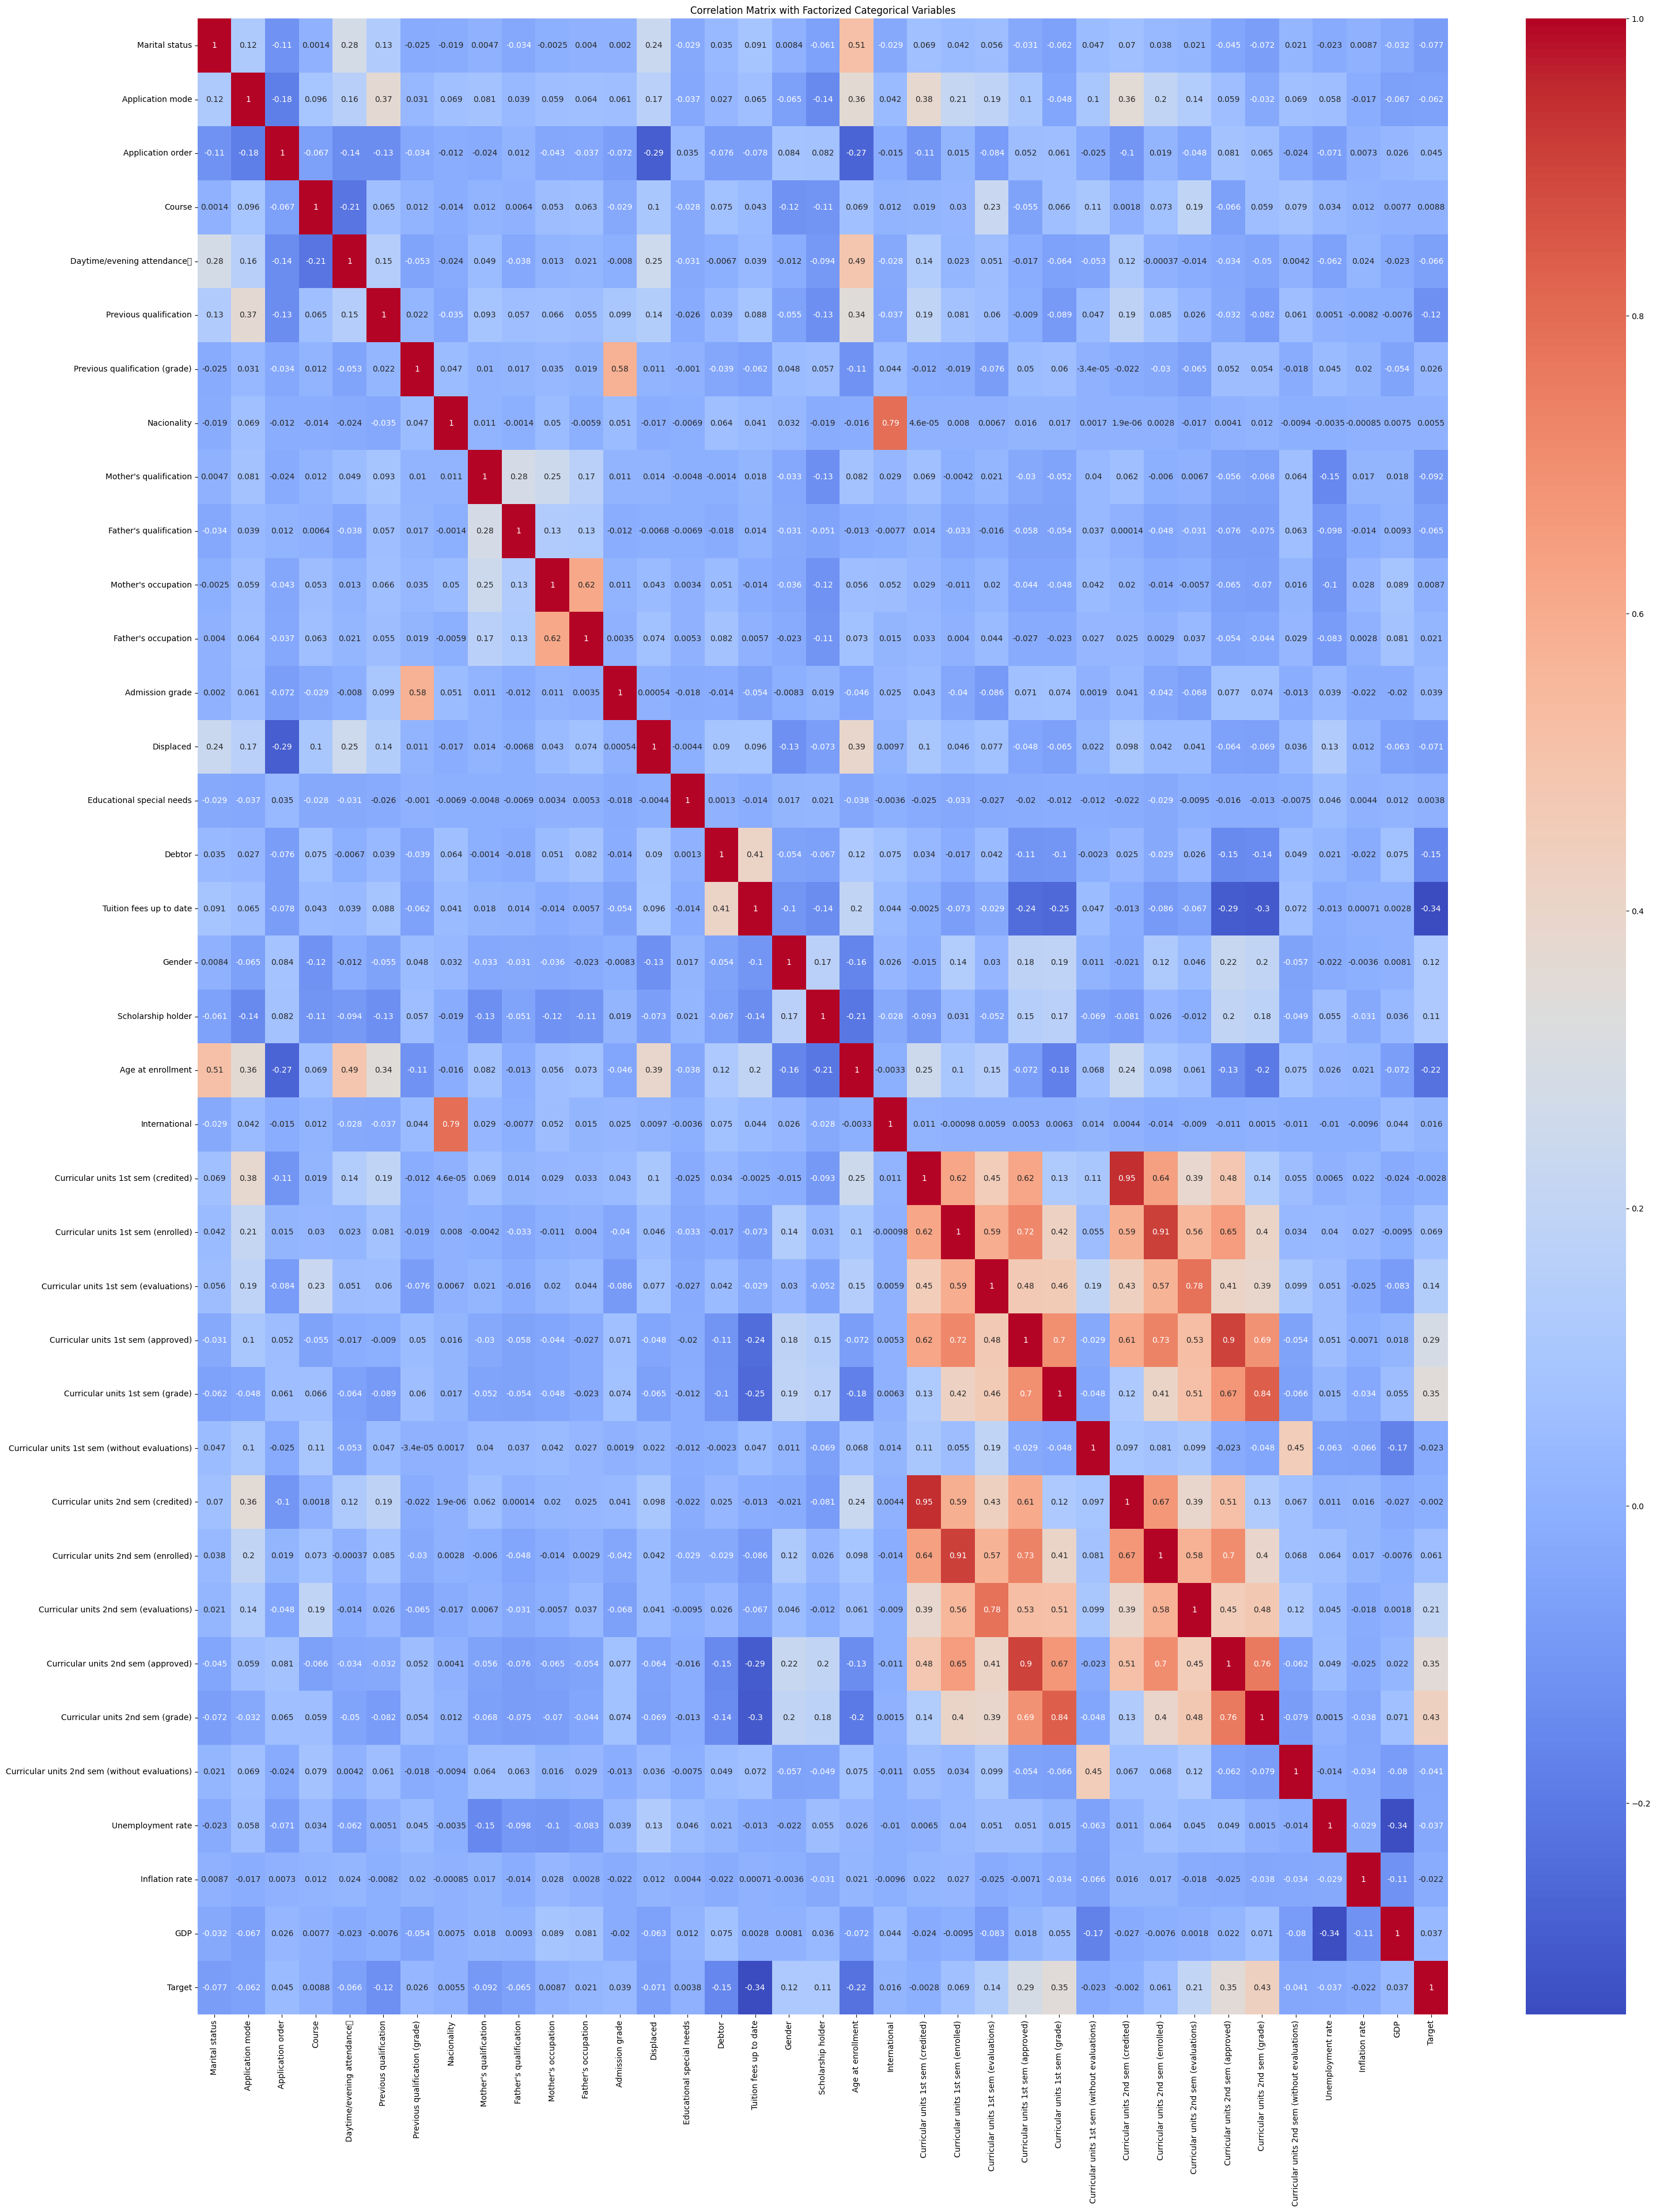

In [24]:
# Factorizing all categorical columns to integers to check correlation

df_temp = data.copy()
for col in df_temp.select_dtypes(include=['object']).columns:
    df_temp[col] = pd.factorize(df_temp[col])[0]

# Calculate and plot the correlation matrix
correlation_matrix = df_temp.corr()
plt.figure(figsize=(35, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Factorized Categorical Variables")
plt.show()

In [25]:
data.head(10)

Marital status                  Application mode Application order  \
0         single    2nd phase - general contingent        5 - choice   
1         single  International student (bachelor)        1 - choice   
2         single    1st phase - general contingent        5 - choice   
3         single    2nd phase - general contingent        2 - choice   
4        married                 Over 23 years old        1 - choice   
5        married                 Over 23 years old        1 - choice   
6         single    1st phase - general contingent        1 - choice   
7         single    3rd phase - general contingent        4 - choice   
8         single    1st phase - general contingent        3 - choice   
9         single    1st phase - general contingent        1 - choice   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   
5      Management (evening attendance)                      evening   
6                              Nursing                      daytime   
7                              Tourism                      daytime   
8                       Social Service                      daytime   
9                       Social Service                      daytime   

                              Previous qualification  \
0                                Secondary education   
1                                Secondary education   
2                                Secondary education   
3                                Secondary education   
4                                Secondary education   
5  Basic education 3rd cycle (9th/10th/11th year)...   
6                                Secondary education   
7                                Secondary education   
8                                Secondary education   
9                                Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   
5                           133.1  Portuguese   
6                           142.0  Portuguese   
7                           119.0  Portuguese   
8                           137.0    Romanian   
9                           138.0  Portuguese   

                              Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   
5  Basic education 1st cycle (4th/5th year) or eq...   
6  Basic Education 3rd Cycle (9th/10th/11th Year)...   
7  Basic education 1st cycle (4th/5th year) or eq...   
8  Secondary Education - 12th Year of Schooling o...   
9  Secondary Education - 12th Year of Schooling o...   

                              Father's qualification  ...  \
0                     Other - 11th Year of Schooling  ...   
1                          Higher Education - Degree  ...   
2  Basic education 1st cycle (4th/5th year) or eq...  ...   
3  Basic education 1st cycle (4th/5th year) or eq...  ...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
5  Basic education 1st cycle (4th/5th year) or eq...  ...   
6  Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
7  Basic education 1st cycle (4th/5th year) or eq...  ...   
8  Secondary Education - 12th Year of Schooling o...  ...   
9  Basic Education 3rd Cycle (9th/10th/11th

## Encoding Categorical Variables

**Methodologies for Encoding:**

**Label Encoding (High cardinality):**

Label encoding is a straightforward method that converts categorical values into numeric labels. This technique is particularly useful for ordinal data where categories have a natural order. Since the original dataset has been label encoded, we apply the original mapping to the catergorical variables with high cardinality

**One-Hot Encoding (Low cardinality):**

One-hot encoding is a technique that creates binary columns for each category in a categorical variable. This method is suitable for nominal data where categories do not have a natural order and also with data with low cardinality.


We select data with low cardinality and apply the one-hot encoding method seperately

In [26]:
#Seperate low cardinality data

low_cardinality_columns = [
    'Daytime/evening attendance\t', 'Gender', 'Scholarship holder',
    'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'International'
]

data_low_cardinality = data[low_cardinality_columns]
data = data.drop(columns=low_cardinality_columns)

In [27]:
data.shape

(4424, 29)

In [28]:
#Revert the remaining categorical variables to Numeric using Mapping

for column, mapping in data_mappings.items():
    if column in data.columns:
        reverse_mapping = {v: k for k, v in mapping.items()}
        data[column] = data[column].map(reverse_mapping).fillna(data[column])

In [29]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                       1                           122.0            1   
1                       1                           160.0            1   
2                       1                           122.0            1   
3                       1                           122.0            1   
4                       1                           100.0            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      19                      12                    5  ...   
1                       1                       3                    3  ...   
2                      37                      37                    9  ...   
3                      38                      37                    5  ...   
4                      37                      38                    9  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                                    0   
1                                  0.0                                    6   
2                                  0.0                                    6   
3                                  0.0                                    6   
4                                  0.0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                     0.0   
1                                     6.0   
2                                     0.0   
3                                    10.0   
4                                     6.0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 29 columns]

In [30]:
#Applying One-Hot encoding to Low cadinality variables and joining with the main data

data_low_cardinality_encoded = pd.get_dummies(data_low_cardinality, drop_first=True)

# Concatenate back the one-hot encoded data with the main dataset
data = pd.concat([data, data_low_cardinality_encoded], axis=1)

In [31]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                       1                           122.0            1   
1                       1                           160.0            1   
2                       1                           122.0            1   
3                       1                           122.0            1   
4                       1                           100.0            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      19                      12                    5  ...   
1                       1                       3                    3  ...   
2                      37                      37                    9  ...   
3                      38                      37                    5  ...   
4                      37                      38                    9  ...   

    GDP    Target  Daytime/evening attendance\t_evening  Gender_male  \
0  1.74   Dropout                                 False         True   
1  0.79  Graduate                                 False         True   
2  1.74   Dropout                                 False         True   
3 -3.12  Graduate                                 False        False   
4  0.79  Graduate                                  True        False   

   Scholarship holder_yes  Displaced_yes  Educational special needs_yes  \
0                   False           True                          False   
1                   False           True                          False   
2                   False           True                          False   
3                   False           True                          False   
4                   False          False                          False   

   Debtor_yes  Tuition fees up to date_yes  International_yes  
0       False                         True              False  
1       False                        False              False  
2       False                        False              False  
3       False                         True              False  
4       False                         True              False  

[5 rows x 37 columns]

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Previous qualification                          4424 non-null   int64  
 5   Previous qualification (grade)                  4424 non-null   float64
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [33]:
#Label encoding the Target variable

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Target'])

data['Target'] = y_encoded

# Display the encoding map for reference
encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Target Encoding Map:", encoding_map)

Target Encoding Map: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


## Features Selection

For feature selection, I will apply Wrapper method with Tree-Based models. This method is selected because it handles mixed data types (categorical and numeric) and can capture complex interactions. It’s especially useful in datasets with many features like this, as it efficiently narrows down the most impactful ones.


In [36]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Previous qualification  Previous qualification (grade)  Nacionality  \
0                       1                           122.0            1   
1                       1                           160.0            1   
2                       1                           122.0            1   
3                       1                           122.0            1   
4                       1                           100.0            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      19                      12                    5  ...   
1                       1                       3                    3  ...   
2                      37                      37                    9  ...   
3                      38                      37                    5  ...   
4                      37                      38                    9  ...   

    GDP  Target  Daytime/evening attendance\t_evening  Gender_male  \
0  1.74       0                                 False         True   
1  0.79       2                                 False         True   
2  1.74       0                                 False         True   
3 -3.12       2                                 False        False   
4  0.79       2                                  True        False   

   Scholarship holder_yes  Displaced_yes  Educational special needs_yes  \
0                   False           True                          False   
1                   False           True                          False   
2                   False           True                          False   
3                   False           True                          False   
4                   False          False                          False   

   Debtor_yes  Tuition fees up to date_yes  International_yes  
0       False                         True              False  
1       False                        False              False  
2       False                        False              False  
3       False                         True              False  
4       False                         True              False  

[5 rows x 37 columns]

In [37]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['Target'])
y = data['Target']

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=0)

# Initialize RFE
rfe_selector = RFE(estimator=rf_model, n_features_to_select=14, step=1)
rfe_selector = rfe_selector.fit(X, y)

# Get selected feature names
selected_columns = X.columns[rfe_selector.support_]
print("Selected features based on RFE:\n", selected_columns)

# Create new DataFrame with selected features
X_selected = X[selected_columns]
print(f"{X.shape[1] - X_selected.shape[1]} features have been removed, {X_selected.shape[1]} features remain")

Selected features based on RFE:
 Index(['Course', 'Previous qualification (grade)', 'Mother's occupation',
       'Father's occupation', 'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP',
       'Tuition fees up to date_yes'],
      dtype='object')
22 features have been removed, 14 features remain


# Splitting dataset into train and test

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=10)

#Verifying the split

y_train_dist = y_train.value_counts()
y_test_dist = y_test.value_counts()

y_train.count(), y_test.count(), y_train_dist, y_test_dist

(3096,
 1328,
 Target
 2    1546
 0     994
 1     556
 Name: count, dtype: int64,
 Target
 2    663
 0    427
 1    238
 Name: count, dtype: int64)

## Handling Class Imbalance

Class imbalance occurs when one class in a dataset is significantly more frequent than others. In this case, Graduate has the most samples, followed by "Dropout" and "Enrolled". This can often lean to bias toward toward majority class i.e model tend to have high overall accuracy but poor performance on minority class.

To handle the Class imbalance, SMOTE method will be applied.

SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority samples, which can improve model learning on the minority class.


In [39]:
pip install -U imbalanced-learn

In [40]:
y_train[::1]

374     0
1765    0
3899    1
239     0
1623    0
       ..
995     2
1312    2
2104    2
2981    2
3074    0
Name: Target, Length: 3096, dtype: int64

In [41]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter

# Initialize SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=0)

# Apply SMOTETomek on the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution before and after resampling
print("Class distribution before SMOTETomek:", Counter(y_train))
print("Class distribution after SMOTETomek:", Counter(y_train_resampled))

Class distribution before SMOTETomek: Counter({2: 1546, 0: 994, 1: 556})
Class distribution after SMOTETomek: Counter({1: 1487, 0: 1485, 2: 1456})


<Axes: xlabel='Target', ylabel='count'>

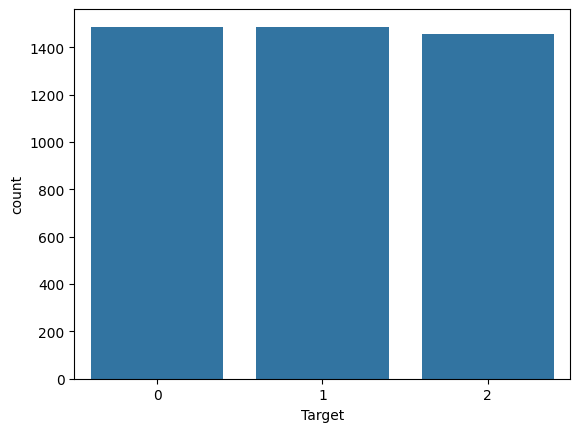

In [42]:
#Visualising the distribution of the data after applying SMOTE

sns.countplot(x=y_train_resampled)

The class imbalance has been handled and the data is now ready for model development

## Standardizing Features

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


X_train_scaled and X_test_scaled are standardized and ready for model training

In [44]:
X_train_scaled[:4,:5]

array([[ 0.11107803,  0.12192392, -0.25846618, -0.1587993 ,  0.14175674],
       [ 0.14141371,  0.68562683, -0.07942728, -0.0836429 ,  0.21434394],
       [ 0.14141371, -0.94829465, -0.07942728, -0.0836429 , -0.45345832],
       [ 0.11107803,  0.12192392, -0.07942728, -0.1587993 ,  0.99828573]])

## Applying Classification Algorithm - Decision Tree Decision Tree Classifier and K Nearest Neighbor (KNN)

In [45]:
#Applying and Fitting Decision Trees
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Model Accuracy: 0.6664156626506024

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       427
           1       0.34      0.37      0.35       238
           2       0.79      0.76      0.77       663

    accuracy                           0.67      1328
   macro avg       0.60      0.61      0.60      1328
weighted avg       0.68      0.67      0.67      1328



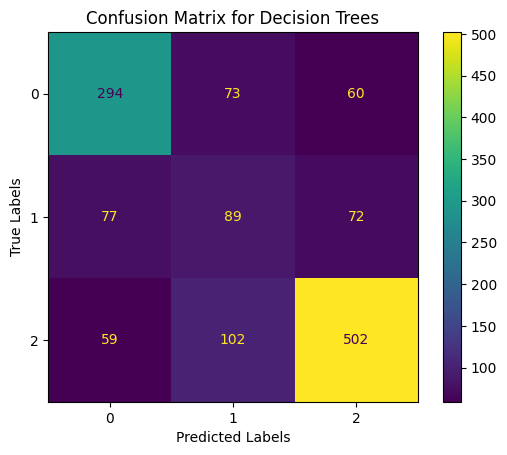

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

In [48]:
#Apply KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [49]:
#Evaluate the model on the test set
y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.6792168674698795

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       427
           1       0.39      0.47      0.43       238
           2       0.81      0.73      0.77       663

    accuracy                           0.68      1328
   macro avg       0.63      0.64      0.63      1328
weighted avg       0.70      0.68      0.69      1328



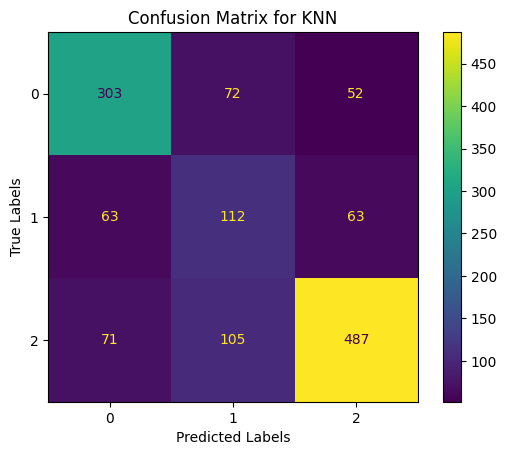

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Confusion Matrix for KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

## Hyperparameter Tuning - Decision Tree Classifier

This step is important order to get the best hyperparameters that can be used to configure the model to get best accurate result. GridSearchCV is used to systematically test different hyperparameters values and find the optimal parameter configuration. In this case, GridSearchCV is configured to search for parameters with higher precision and recall since this is a critical metric when there is class imnbalance

**Key Hyperparameters for each model include:**

**Decision Tree Classifier**:

`max_depth`: Controls the maximum depth of the tree

`min_samples_split `: Minimum number of samples required to split a node

`min_samples_leaf`: Minimum number of samples required to be at a leaf node

`criterion`:Measures the quality of a split (gini or entropy).

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define an updated hyperparameter grid for Decision Tree
tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Use accuracy as the scoring metric
scoring = make_scorer(accuracy_score)

# Set up GridSearchCV with the expanded grid and accuracy scoring
grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring=scoring, refit=True, n_jobs=-1, verbose=1)
grid_tree.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best accuracy score
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best Decision Tree accuracy:", grid_tree.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.745269158663963


In [52]:
# Retrain the model with the best parameters

classifier_optimized = DecisionTreeClassifier(criterion = 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, class_weight='balanced', random_state=0)
classifier_optimized.fit(X_train_resampled, y_train_resampled)

y_pred_optimized_dt = classifier_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_optimized_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_dt))

Model Accuracy: 0.6649096385542169

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       427
           1       0.35      0.39      0.37       238
           2       0.79      0.76      0.77       663

    accuracy                           0.66      1328
   macro avg       0.60      0.61      0.61      1328
weighted avg       0.67      0.66      0.67      1328



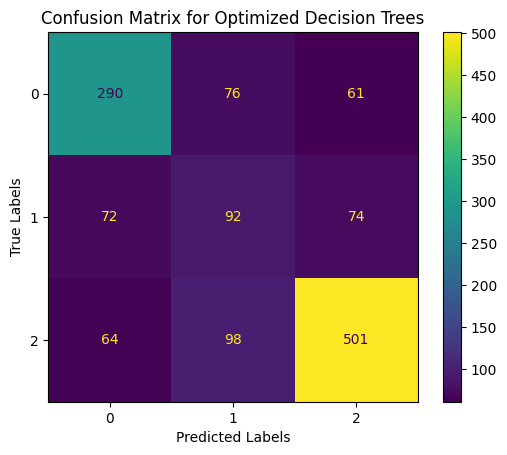

In [53]:
# Create confusion matrix after optimized model
cm_optimized_dt = confusion_matrix(y_test, y_pred_optimized_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

#Hyperparameters Tuning for KNN

**Key Hyperparameters for each model include:**

**KNN**:

`n_neighbors`: Number of neighbors to consider for classification

`weights`: Weight function used in prediction (uniform or distance).

`metric`: Distance metric for neighbors (e.g., euclidean, manhattan).

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Set up scoring with average parameter for multi-class
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted', zero_division=1)
}

# GridSearchCV to select based on recall first
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='recall', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train_resampled)

# Output best parameters and individual scores for KNN based on highest recall
print("\nBest parameters for KNN (based on recall):", grid_knn.best_params_)
print("Best KNN recall score:", grid_knn.best_score_)
print("\nMean Test Scores for each metric:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}:", grid_knn.cv_results_[f'mean_test_{metric}'])

# Repeat GridSearchCV with refit='precision'
grid_knn_precision = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='precision', return_train_score=True)
grid_knn_precision.fit(X_train_scaled, y_train_resampled)

print("\nBest parameters for KNN (based on precision):", grid_knn_precision.best_params_)
print("Best KNN precision score:", grid_knn_precision.best_score_)


Best parameters for KNN (based on recall): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN recall score: 0.8439540370611267

Mean Test Scores for each metric:
Accuracy: [0.78952494 0.82069174 0.7802645  0.81956129 0.77078063 0.81188328
 0.76603818 0.80940072 0.7635546  0.80375407 0.75655303 0.79539656
 0.7563273  0.79449465 0.75451914 0.79291324 0.75090561 0.7850095
 0.81640025 0.84395404 0.79810843 0.83582278 0.78794327 0.82882223
 0.77913813 0.82046805 0.77755825 0.81798319 0.7746232  0.81324125
 0.76965502 0.81166137 0.76717068 0.81121042 0.7619737  0.80646695]
Precision: [0.79630649 0.82970855 0.78993898 0.83036766 0.78132342 0.82422231
 0.77745257 0.82266239 0.77706589 0.81853817 0.77085515 0.81087409
 0.77168406 0.81107792 0.77150905 0.81020413 0.76926139 0.80407183
 0.82245383 0.85238659 0.80633799 0.84474424 0.7980391  0.83926625
 0.7895698  0.8313881  0.79019789 0.8298414  0.7892152  0.82707572
 0.78486155 0.82613752 0.78355034 0.82583762 0.77955315 

In [55]:
#Apply KNN Algorithm using the Best parameters

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn_optimized = KNeighborsClassifier(n_neighbors=3, metric = "manhattan", weights= "distance")
knn_optimized.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [56]:
#Evaluate the model on the test set after optimization

y_pred_optimized_knn = knn_optimized.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_optimized_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_knn))

KNN Model Accuracy: 0.713855421686747

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       427
           1       0.42      0.49      0.45       238
           2       0.80      0.81      0.80       663

    accuracy                           0.71      1328
   macro avg       0.66      0.66      0.66      1328
weighted avg       0.72      0.71      0.72      1328



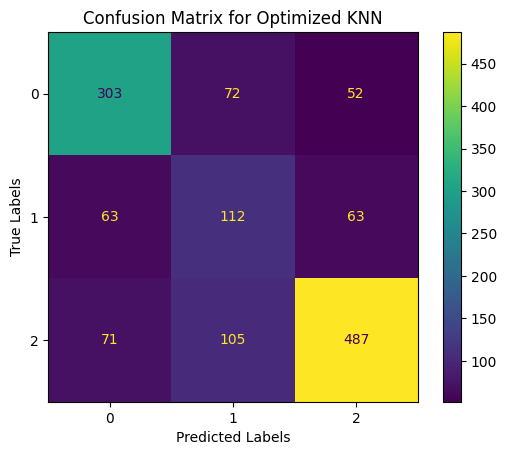

In [57]:
# Create confusion matrix for the optimized model

cm_optimized_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_knn)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

# Using Ensemble Model

Ensemble Models are classification algorithms that combine the predictions of multiple “weaker” models (often called base estimators) to produce a more accurate final prediction. They’re particularly useful in handling class imbalance and complex data patterns because they aggregate predictions, reducing bias and variance.


In [58]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred_brf = brf_classifier.predict(X_test)
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report for Balanced Random Forest:\n", classification_report(y_test, y_pred_brf))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Accuracy: 0.7552710843373494

Classification Report for Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       427
           1       0.51      0.49      0.50       238
           2       0.81      0.87      0.84       663

    accuracy                           0.76      1328
   macro avg       0.70      0.69      0.70      1328
weighted avg       0.75      0.76      0.75      1328



In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost with class weight adjustments for imbalance
xgb = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=0)

# Train on the original or SMOTE-resampled data
xgb.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:14:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7635542168674698

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       427
           1       0.54      0.42      0.47       238
           2       0.81      0.89      0.85       663

    accuracy                           0.76      1328
   macro avg       0.71      0.69      0.70      1328
weighted avg       0.75      0.76      0.76      1328



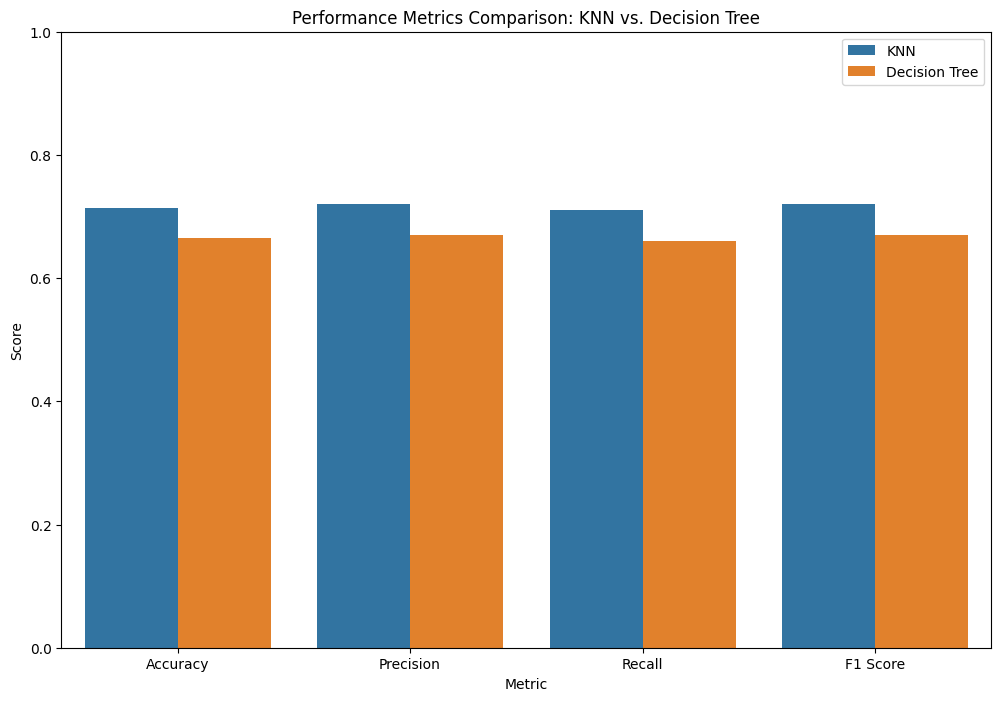

In [60]:
# Comparing thr two Model Results - Need to review code

accuracy_knn, precision_knn, recall_knn, f1_knn = 0.7139, 0.72, 0.71, 0.72
accuracy_dt, precision_dt, recall_dt, f1_dt = 0.6649, 0.67, 0.66, 0.67

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})

# Melt the DataFrame for easier plotting
metrics_melted_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plot the performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted_df)
plt.title('Performance Metrics Comparison: KNN vs. Decision Tree')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='upper right')
plt.show()
